<a href="https://www.kaggle.com/code/ocanaydin/traffic-activity-dl?scriptVersionId=141554507" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [108]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/italian-telecom-data-2013-1week/sms-call-internet-mi-2013-11-06.csv
/kaggle/input/italian-telecom-data-2013-1week/milano_grids.PNG
/kaggle/input/italian-telecom-data-2013-1week/sms-call-internet-mi-2013-11-09.csv
/kaggle/input/italian-telecom-data-2013-1week/sms-call-internet-mi-2013-11-04.csv
/kaggle/input/italian-telecom-data-2013-1week/sms-call-internet-mi-2013-11-08.csv
/kaggle/input/italian-telecom-data-2013-1week/sms-call-internet-mi-2013-11-05.csv
/kaggle/input/italian-telecom-data-2013-1week/sms-call-internet-mi-2013-11-10.csv
/kaggle/input/italian-telecom-data-2013-1week/sms-call-internet-mi-2013-11-07.csv
/kaggle/input/mobile-phone-activity/mi-to-provinces-2013-11-02.csv
/kaggle/input/mobile-phone-activity/mi-to-provinces-2013-11-03.csv
/kaggle/input/mobile-phone-activity/mi-to-provinces-2013-11-05.csv
/kaggle/input/mobile-phone-activity/Italian_provinces.geojson
/kaggle/input/mobile-phone-activity/ISTAT_census_variables_2011.csv
/kaggle/input/mobile-phone-activ

# REFERENCES

[1] P. Kaushik, S. Singh and P. Yadav, "Traffic Prediction in Telecom Systems Using Deep Learning," 2018 7th International Conference on Reliability, Infocom Technologies and Optimization (Trends and Future Directions) (ICRITO), Noida, India, 2018, pp. 302-307, doi: 10.1109/ICRITO.2018.8748386

[2] https://www.nature.com/articles/sdata201555

# DATA PREPARATION

**Get data from 04-11-2013 to 10-11-2013**

**Monday to Sunday**

In [109]:
def get_and_process(data_list):
    datasets = {}
    #Days of dataset.
    days = ["monday","tuesday","wednesday","thursday","friday","saturday","sunday"]
    #Features of dataset to find total activity.
    cols = ["smsin","smsout","callin","callout","internet"]
    #Counter to change days for each dataset.
    i = 0
    for data_name in data_list:
        #Get data as df.
        df = pd.read_csv(data_name)
        #Drop nan features as whole row.
        df.dropna(axis = "index",inplace = True)
        #Sum all features to find total activity.(as suggested in paper[1])
        df["total_activity"] = df[cols].sum(axis = 1)
        #Add daily df to datasets list.
        datasets[days[i]] = df
        #Convert timestamp to datetime.
        datasets[days[i]]["datetime"] = pd.to_datetime(datasets[days[i]]["datetime"],unit = "ms")
        
        i = i + 1
    return datasets

In [110]:
#Get csv file names and use them in get_and_process function which defined in above cell.
data_list = ["/kaggle/input/italian-telecom-data-2013-1week/sms-call-internet-mi-2013-11-04.csv",
            "/kaggle/input/italian-telecom-data-2013-1week/sms-call-internet-mi-2013-11-05.csv",
            "/kaggle/input/italian-telecom-data-2013-1week/sms-call-internet-mi-2013-11-06.csv",
            "/kaggle/input/italian-telecom-data-2013-1week/sms-call-internet-mi-2013-11-07.csv",
            "/kaggle/input/italian-telecom-data-2013-1week/sms-call-internet-mi-2013-11-08.csv",
            "/kaggle/input/italian-telecom-data-2013-1week/sms-call-internet-mi-2013-11-09.csv",
            "/kaggle/input/italian-telecom-data-2013-1week/sms-call-internet-mi-2013-11-10.csv"]
datasets = get_and_process(data_list)

**Find "traffic level" as suggested in paper**

**0-20 => 1 , 20-40 => 2  , 40-60 => 3 , 60-80 => 4 , 80-100 => 5 , >100 => 6**

In [111]:
def find_traffic_level(datasets):
    for i in datasets.keys():
        #Conditions as suggested in paper[1].
        conditions = [
                     (datasets[i]["total_activity"] >= 0.0) & (datasets[i]["total_activity"] < 20.0),
                     (datasets[i]["total_activity"] >= 20.0) & (datasets[i]["total_activity"] < 40.0),
                     (datasets[i]["total_activity"] >= 40.0) & (datasets[i]["total_activity"] < 60.0),
                     (datasets[i]["total_activity"] >= 60.0) & (datasets[i]["total_activity"] < 80.0),
                     (datasets[i]["total_activity"] >= 80.0) & (datasets[i]["total_activity"] < 100.0),
                     (datasets[i]["total_activity"] >= 100.0)
                     ]    
        values = [1,2,3,4,5,6]
        #Create a new feature using above conditions.
        datasets[i]["traffic_level"] = np.select(conditions,values)
    
    return datasets


In [112]:
#Get datasets with traffic level.
datasets = find_traffic_level(datasets)

In [113]:
datasets["tuesday"].head(5)

CellID            datetime  countrycode     smsin    smsout    callin  \
2        1 2013-11-04 23:00:00           39  0.088512  0.141950  0.108039   
4        1 2013-11-04 23:10:00           39  0.352127  0.192976  0.080738   
6        1 2013-11-04 23:20:00           39  0.374689  0.464279  0.054601   
8        1 2013-11-04 23:30:00           39  0.186451  0.105713  0.003575   
10       1 2013-11-04 23:40:00           39  0.321790  0.109826  0.003575   

     callout   internet  total_activity  traffic_level  
2   0.027300   9.203215        9.569016              1  
4   0.109202   9.296294       10.031337              1  
6   0.026137  10.026710       10.946417              1  
8   0.026137   8.850917        9.172793              1  
10  0.079575  10.510884       11.025650              1

# EXPLORATORY DATA ANALYSIS (EDA)

In [114]:
#Import plot libraries
import matplotlib.pyplot as plt
import seaborn as sns

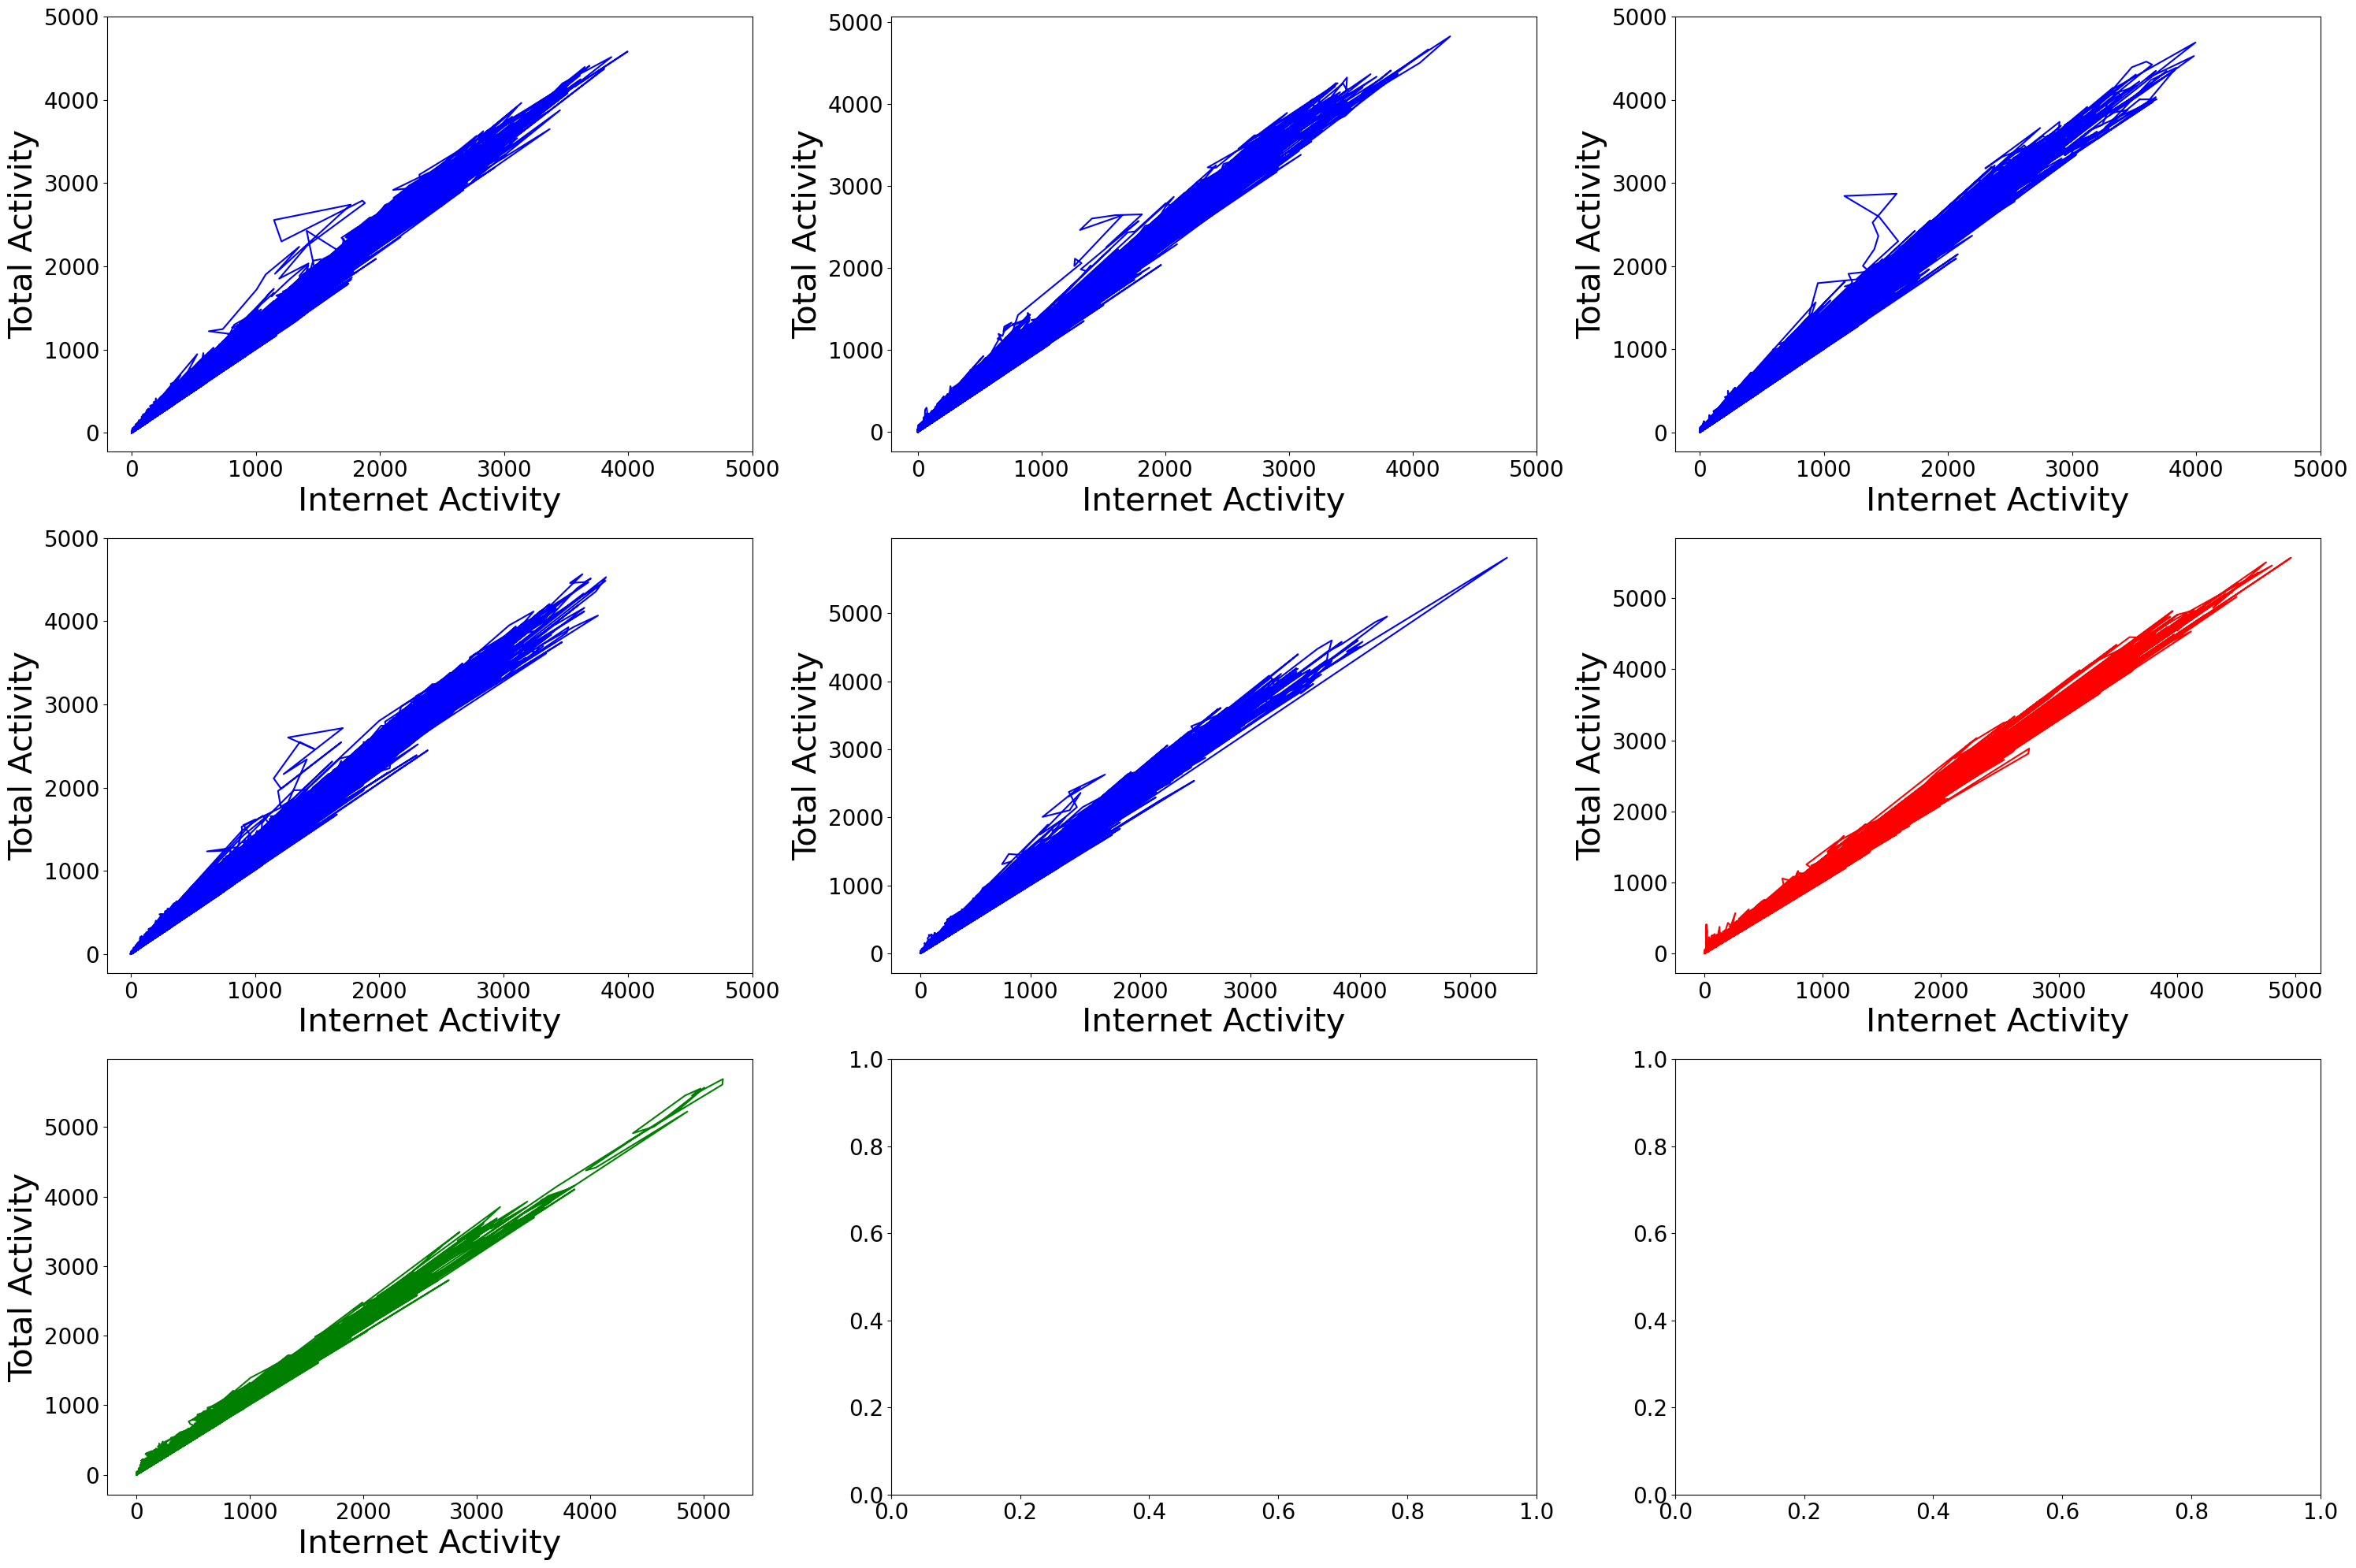

In [115]:
import matplotlib.pyplot as plt
import matplotlib as mpl
label_size = 20
mpl.rcParams['xtick.labelsize'] = label_size
mpl.rcParams['ytick.labelsize'] = label_size
#INTERNET VS TOTAL ACTIVITIY BY DAYS.
colors = ["b","b","b","b","b","r","g"]
fig,axs = plt.subplots(3,3,figsize = (30,20))
axs = axs.ravel()


for i,key in enumerate(datasets.keys()):
    axs[i].plot(datasets[key]["internet"],datasets[key]["total_activity"],c = colors[i])
    axs[i].set_xlabel("Internet Activity",fontsize = 30)
    axs[i].set_ylabel("Total Activity",fontsize = 30)
    
    axs[i].set_xticks(np.arange(0,6000,1000))
    axs[i].set_yticks(np.arange(0,6000,1000))

plt.tight_layout()


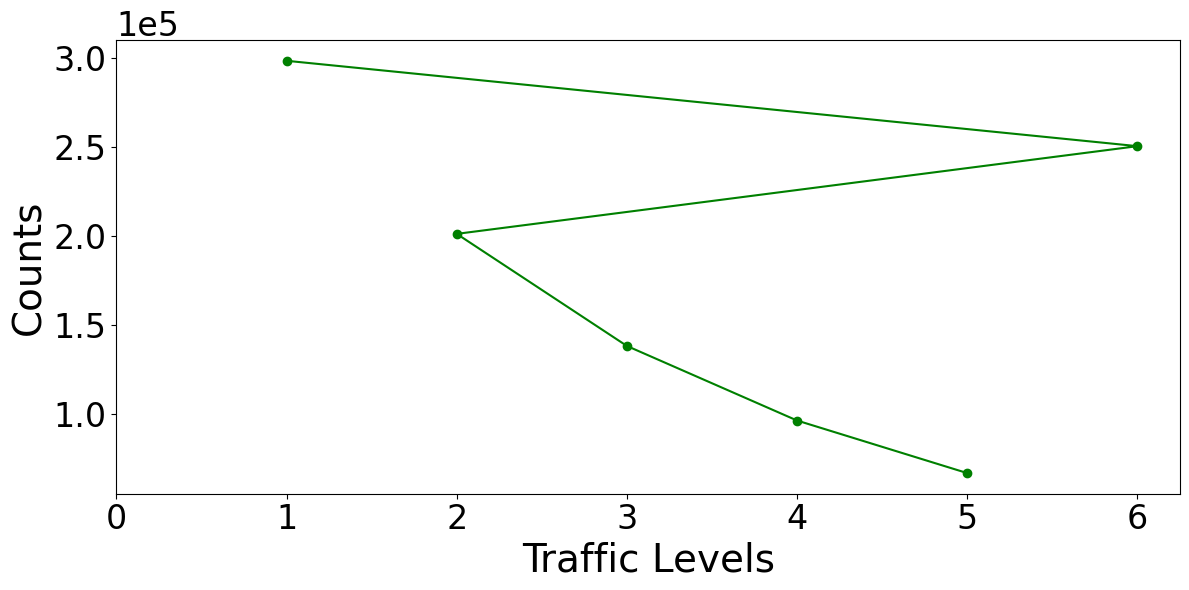

In [116]:
import matplotlib as mpl

label_size = 24
mpl.rcParams['xtick.labelsize'] = label_size
mpl.rcParams['ytick.labelsize'] = label_size
#Traffic Level Variation
colors = ["b","b","b","b","b","r","g"]
fig = plt.figure(figsize = (12,6))
key = "sunday"
plt.plot(datasets[key]["traffic_level"].value_counts(),c = colors[6],marker = "o")
plt.xlabel("Traffic Levels",fontsize = 28)
plt.ylabel("Counts",fontsize = 28)
    
plt.xticks(np.arange(0,7,1))
plt.ticklabel_format(style='sci',scilimits=(5,5),axis='y')

plt.tight_layout()
plt.savefig(f"/kaggle/working/{key}")

0
1
2
3
4
5
6


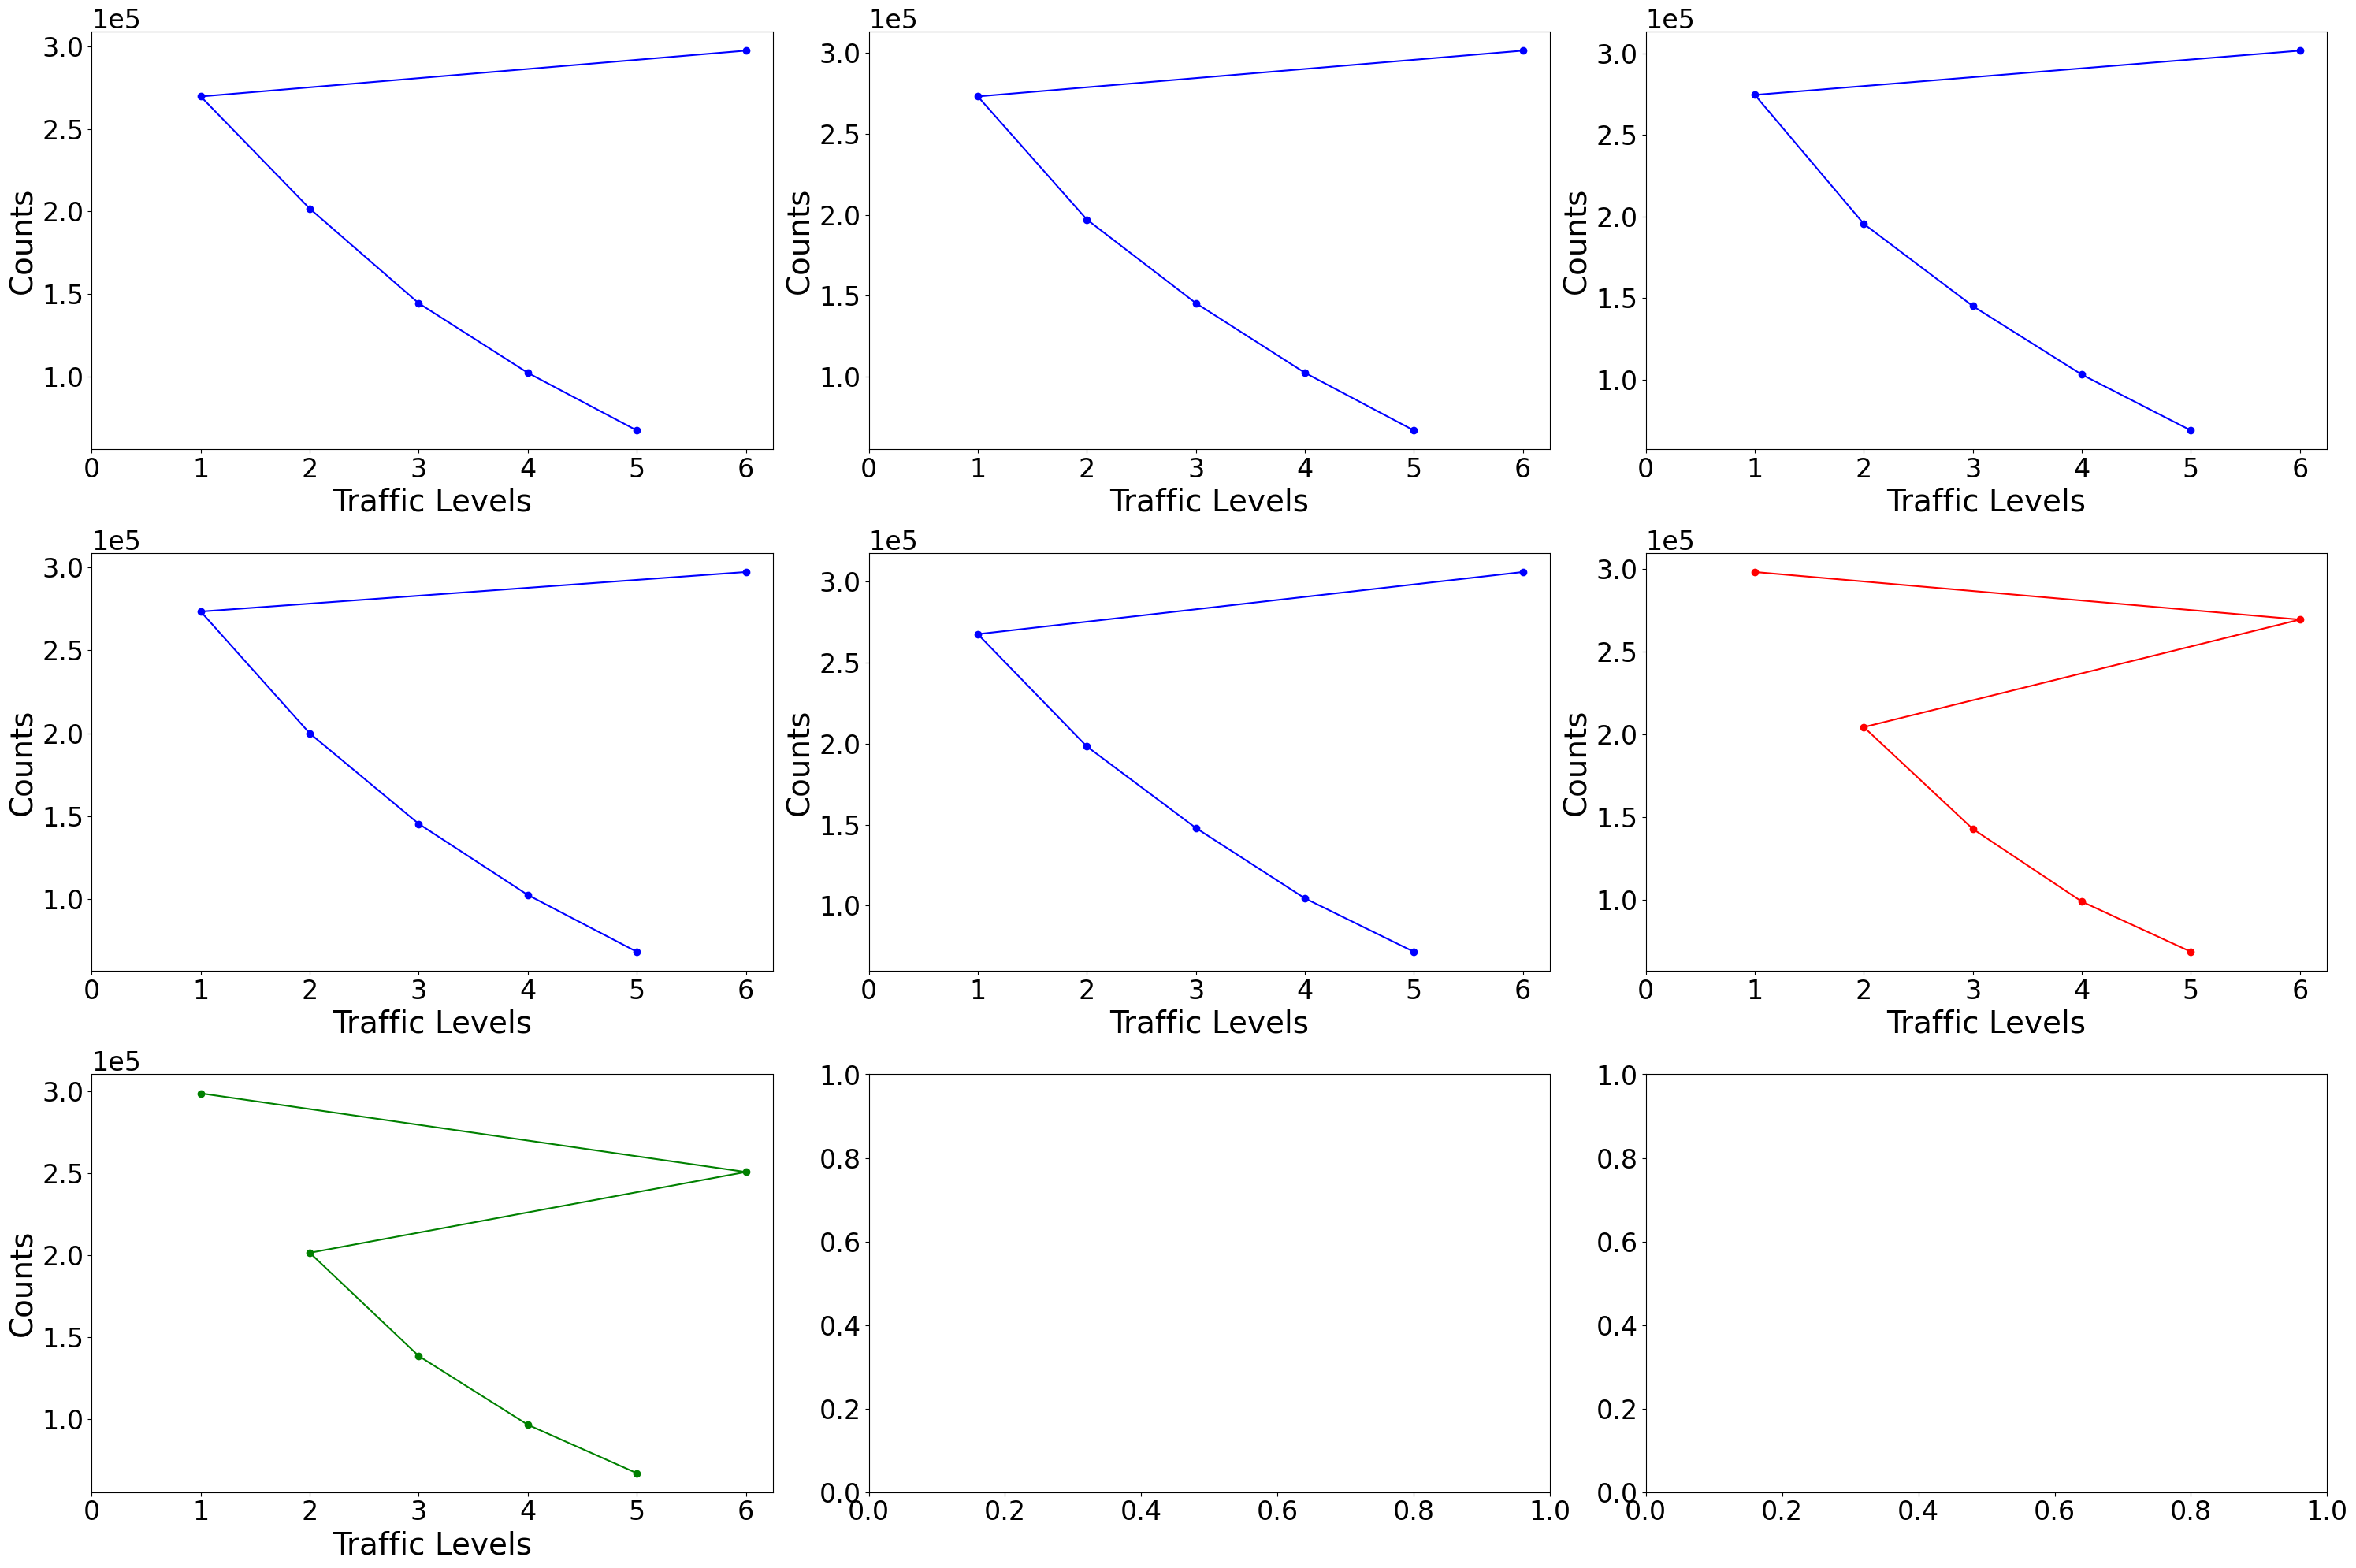

In [117]:
import matplotlib as mpl

label_size = 24
mpl.rcParams['xtick.labelsize'] = label_size
mpl.rcParams['ytick.labelsize'] = label_size

#mpl.rcParams["axes.formatter.limits"] = (-5,6)
#Traffic Level Variation
colors = ["b","b","b","b","b","r","g"]
fig,axs = plt.subplots(3,3,figsize = (30,20))
axs = axs.ravel()



for i,key in enumerate(datasets.keys()):
    axs[i].plot(datasets[key]["traffic_level"].value_counts(),c = colors[i],marker = "o")
    axs[i].set_xlabel("Traffic Levels",fontsize = 28)
    axs[i].set_ylabel("Counts",fontsize = 28)
    
    axs[i].set_xticks(np.arange(0,7,1))
    axs[i].ticklabel_format(style='sci',scilimits=(5,5),axis='y')
    
    print(i)
plt.tight_layout()

**Milano grid map is obtained using milano-grid.geojson file which is created in :**

https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/QJWLFU

**Using below link :**

https://geojson.io/#map=10.63/45.4551/9.1597/90.4/2

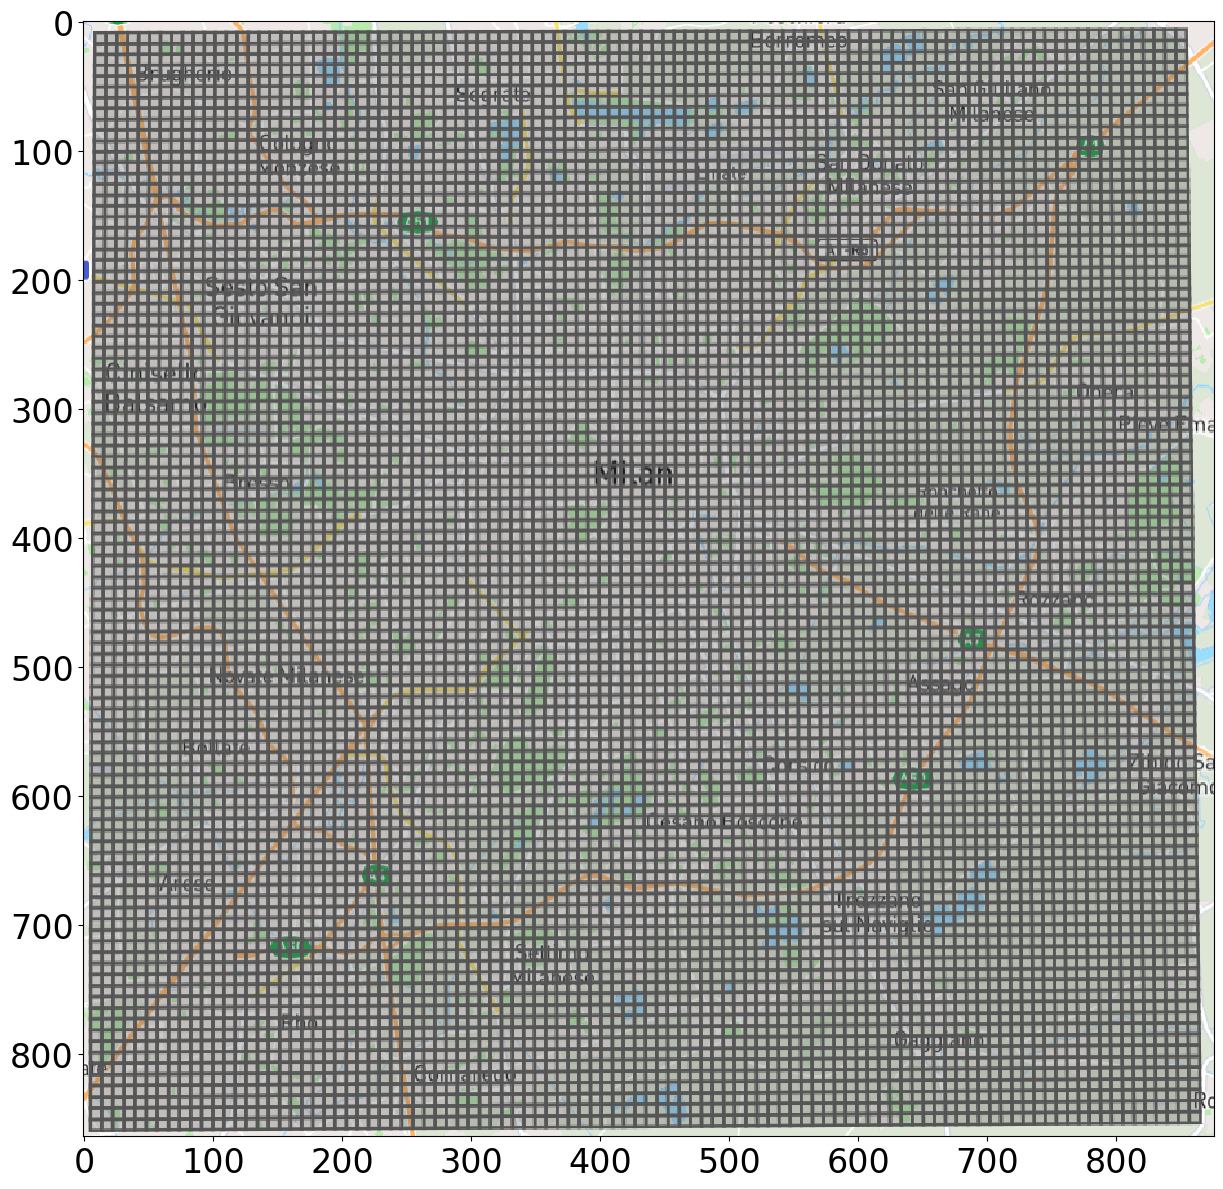

In [118]:
from skimage import io
fig = plt.figure(figsize = (20,12))
img = io.imread("/kaggle/input/italian-telecom-data-2013-1week/milano_grids.PNG")
io.imshow(img)

In [119]:
#Find the sum of 7 days total activities by each cell to find special places.
df_weekly = pd.DataFrame()
for key in datasets.keys():
    df_sum = datasets[key].groupby(["CellID"]).sum().sort_values("total_activity",ascending = False)
    df_weekly = pd.concat([df_weekly,df_sum]).groupby(["CellID"]).sum().sort_values("total_activity",ascending = False)

/tmp/ipykernel_28/3563610034.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_sum = datasets[key].groupby(["CellID"]).sum().sort_values("total_activity",ascending = False)
/tmp/ipykernel_28/3563610034.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_sum = datasets[key].groupby(["CellID"]).sum().sort_values("total_activity",ascending = False)
/tmp/ipykernel_28/3563610034.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the

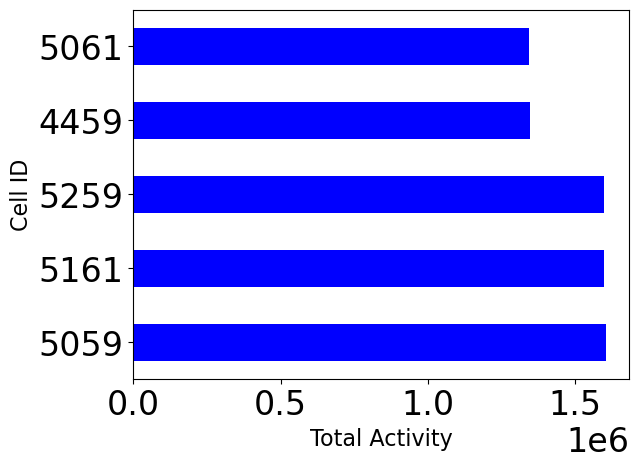

In [120]:
df_weekly["total_activity"].head(5).plot.barh(color = "b")
plt.xlabel("Total Activity",fontsize = 16)
plt.ylabel("Cell ID",fontsize = 16)
plt.savefig("/kaggle/working/total_activity_cellID")

In [121]:
#Due to high traffic,we can extract that these 5 places are attractions in milan.
places = {"Duomo" : 5059,"Palazzo Spinola" : 5161,"Palazzo Clerici" : 5259,"Navigli" : 4459,
         "Milan Cathedral" : 5061}

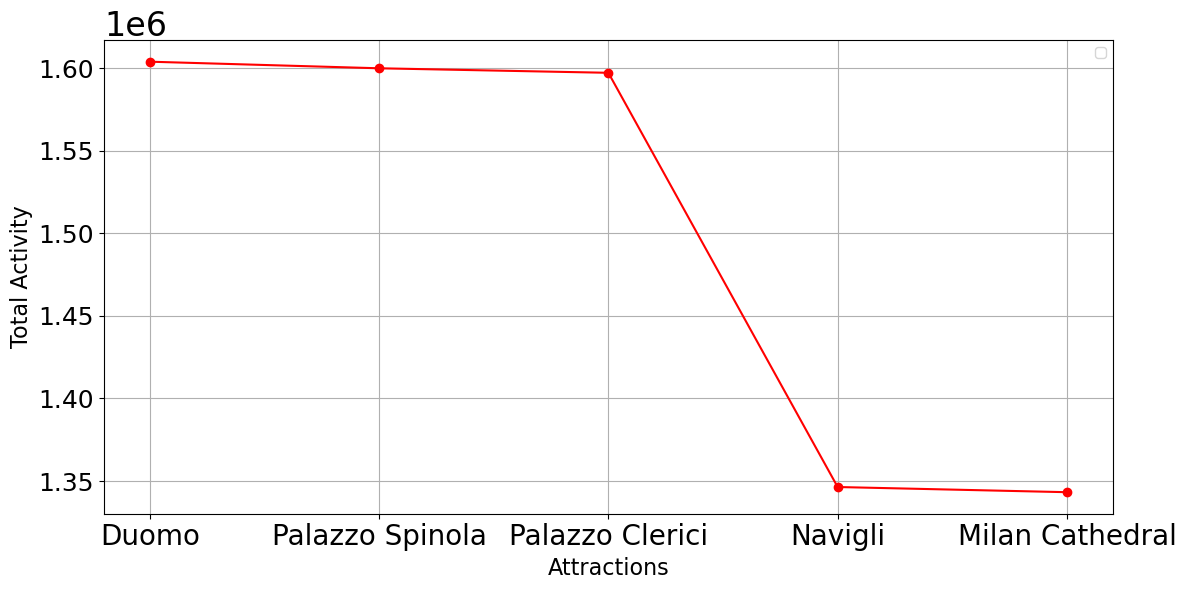

In [122]:
#PLOT THE MOST 5 ATTRACTIONS'S TOTAL ACTIVITIES IN MILAN
fig,ax= plt.subplots(figsize = (12,6))
ax.grid()

plt.plot(list(places.keys()),df_weekly.loc[list(places.values())]["total_activity"],marker = "o",c = "r")
x = np.array([0,1,2,3,4])

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 18)
plt.legend()

plt.ylabel("Total Activity",fontsize = 16)
plt.xlabel("Attractions",fontsize = 16)

plt.tight_layout()

plt.savefig("/kaggle/working/top_attractions")

In [123]:
#Get the CellID's infos by day to day.
df_day2day = pd.DataFrame()
for key in datasets.keys():
    df_day = datasets[key].groupby(["CellID"]).sum().loc[list(places.values()),:]
    df_day["day"] = key
    df_day2day = pd.concat([df_day2day,df_day])


/tmp/ipykernel_28/3876212483.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_day = datasets[key].groupby(["CellID"]).sum().loc[list(places.values()),:]
/tmp/ipykernel_28/3876212483.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_day = datasets[key].groupby(["CellID"]).sum().loc[list(places.values()),:]
/tmp/ipykernel_28/3876212483.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_day = datasets[key].gr

In [124]:
list(places.keys())

['Duomo', 'Palazzo Spinola', 'Palazzo Clerici', 'Navigli', 'Milan Cathedral']

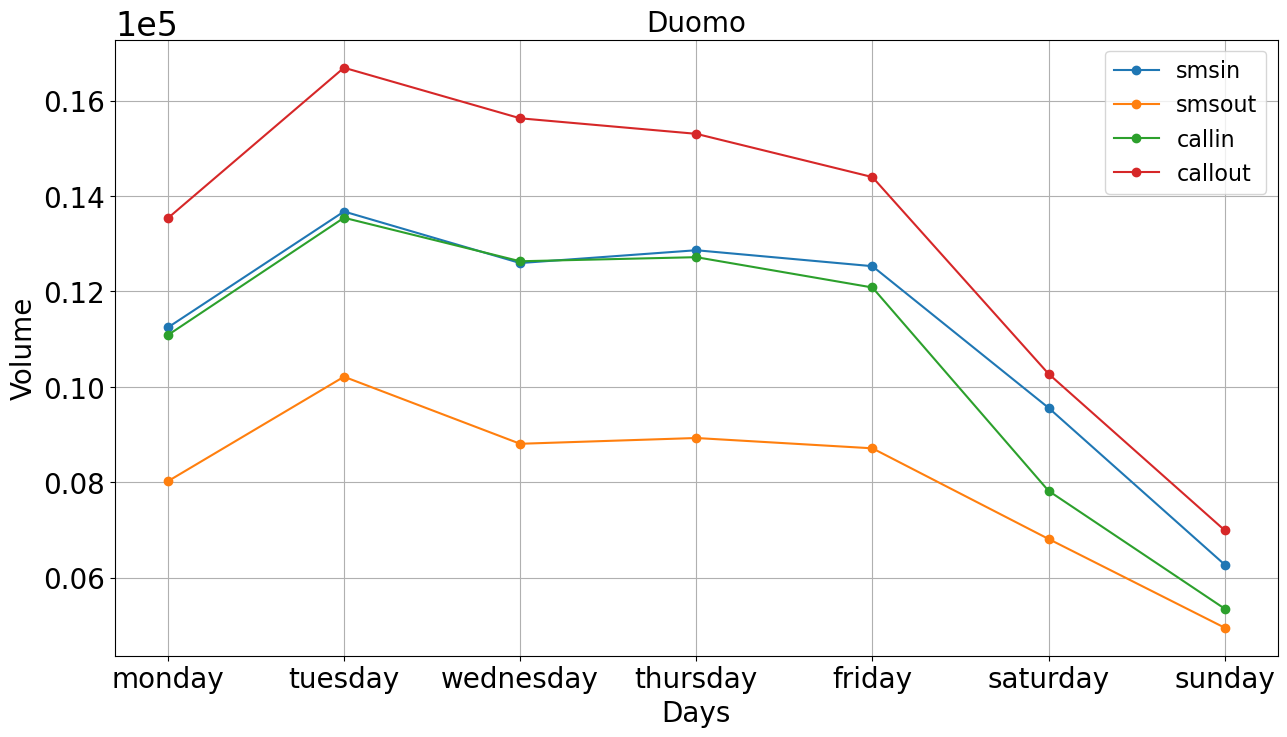

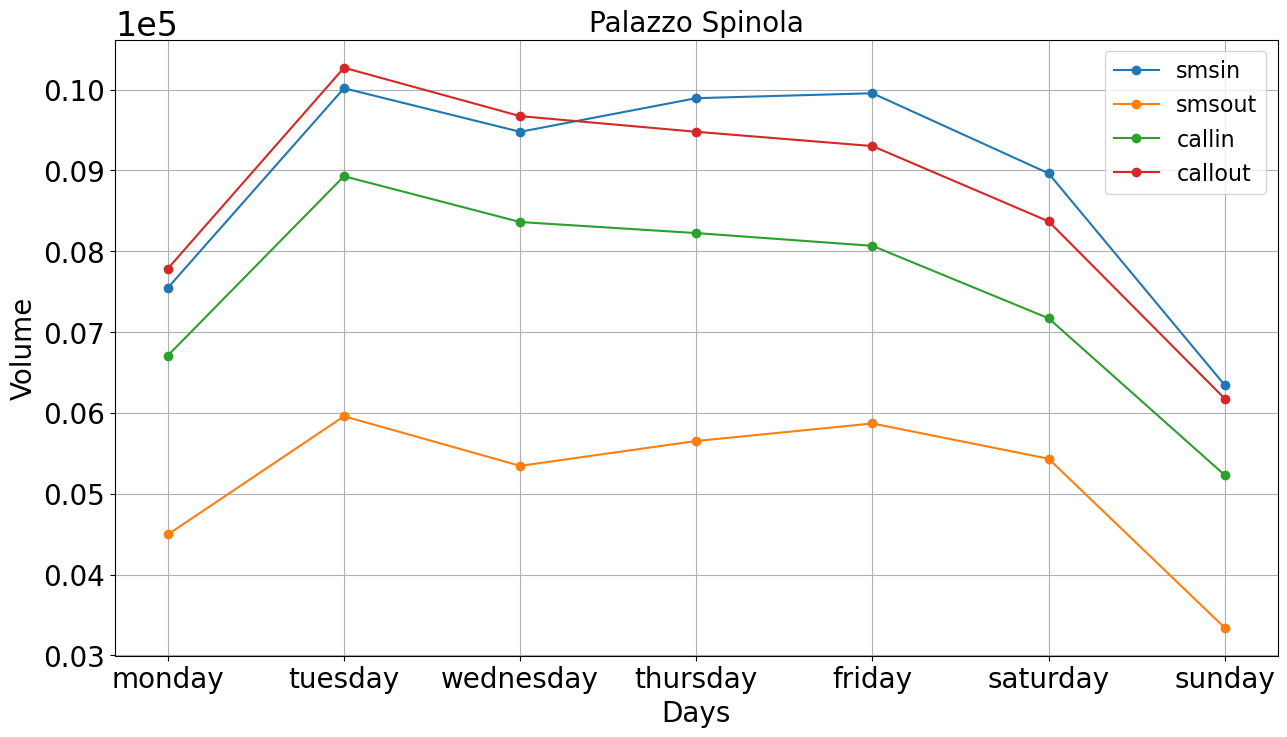

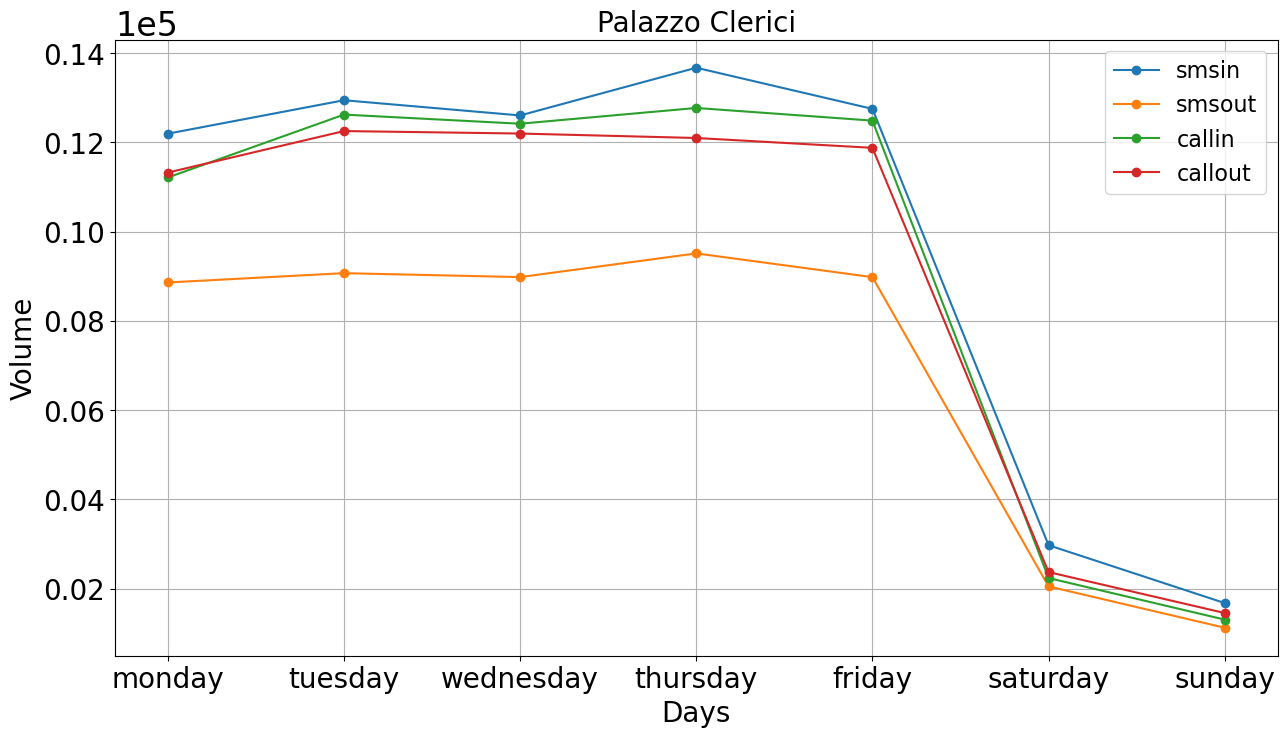

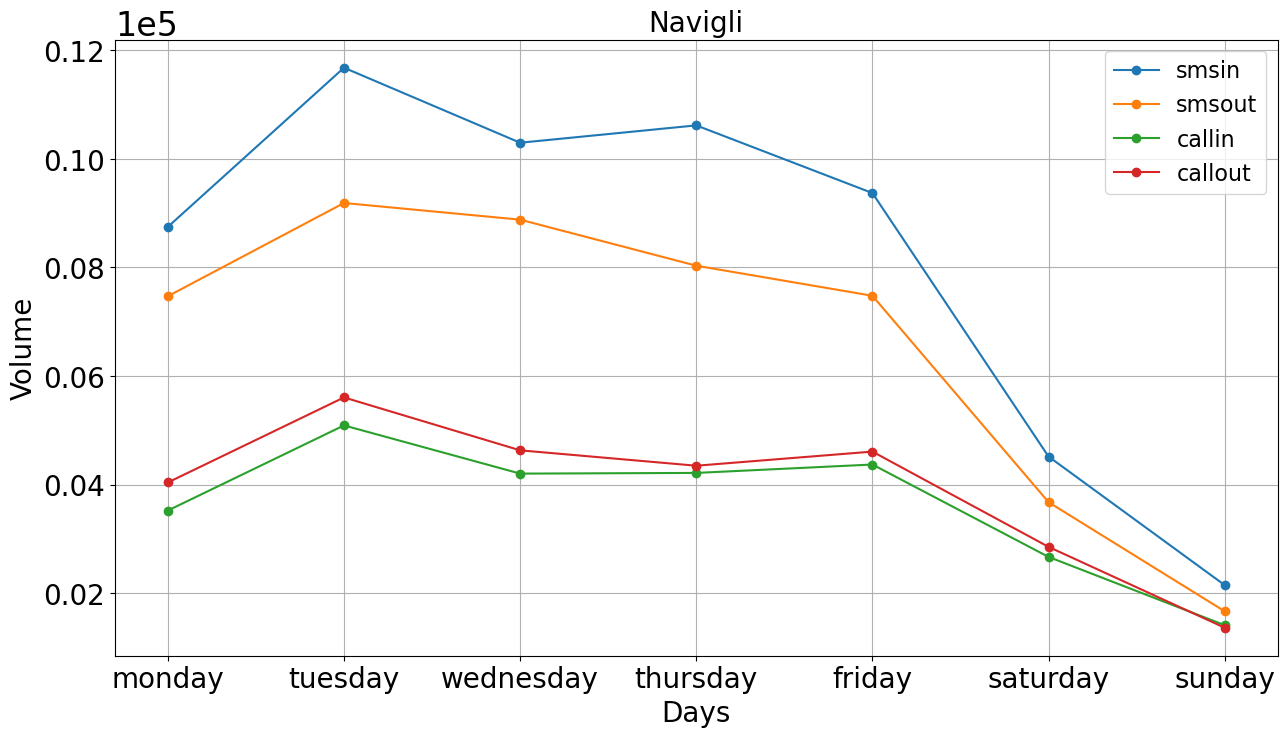

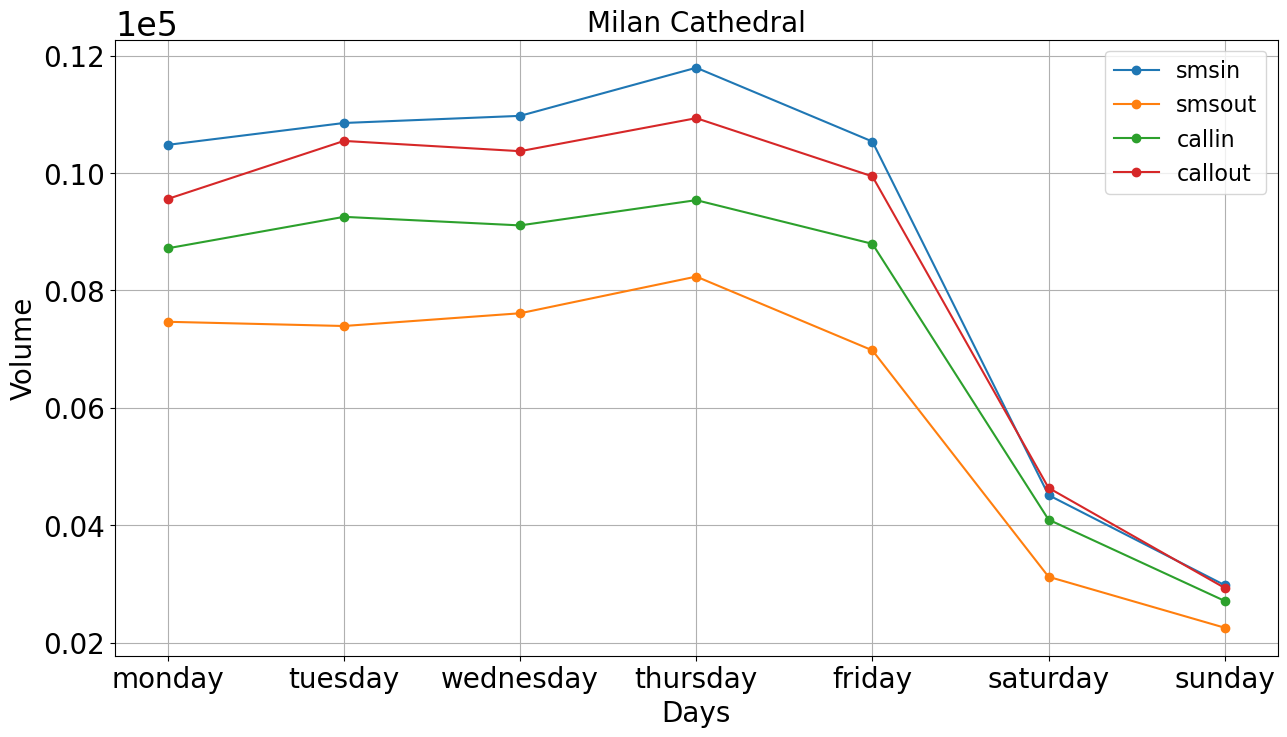

In [125]:
def plot_day_attractions(df_day2day,place_rank):
    place_cell = list(places.values())[place_rank]
    data = df_day2day.loc[place_cell,["day","smsin","smsout","callin","callout"]]

    fig,ax= plt.subplots(figsize = (15,8))
    ax.grid()
    
    place_name = list(places.keys())[place_rank]
    
    plt.title(f"{place_name}",fontsize = 20)
    
    plt.plot(data["day"],data.iloc[:,1:],marker = "o")
    
    plt.legend(labels = ["smsin","smsout","callin","callout"],fontsize = 16)
    plt.ylabel("Volume",fontsize = 20)
    plt.xlabel("Days",fontsize = 20)
    
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.ticklabel_format(style='sci',scilimits=(5,5),axis='y')

    plt.savefig(f"/kaggle/working/{list(places.keys())[place_rank]}")
    
    plt.show()
    


for i in range(len(list(places.values()))):
    plot_day_attractions(df_day2day,i)
    

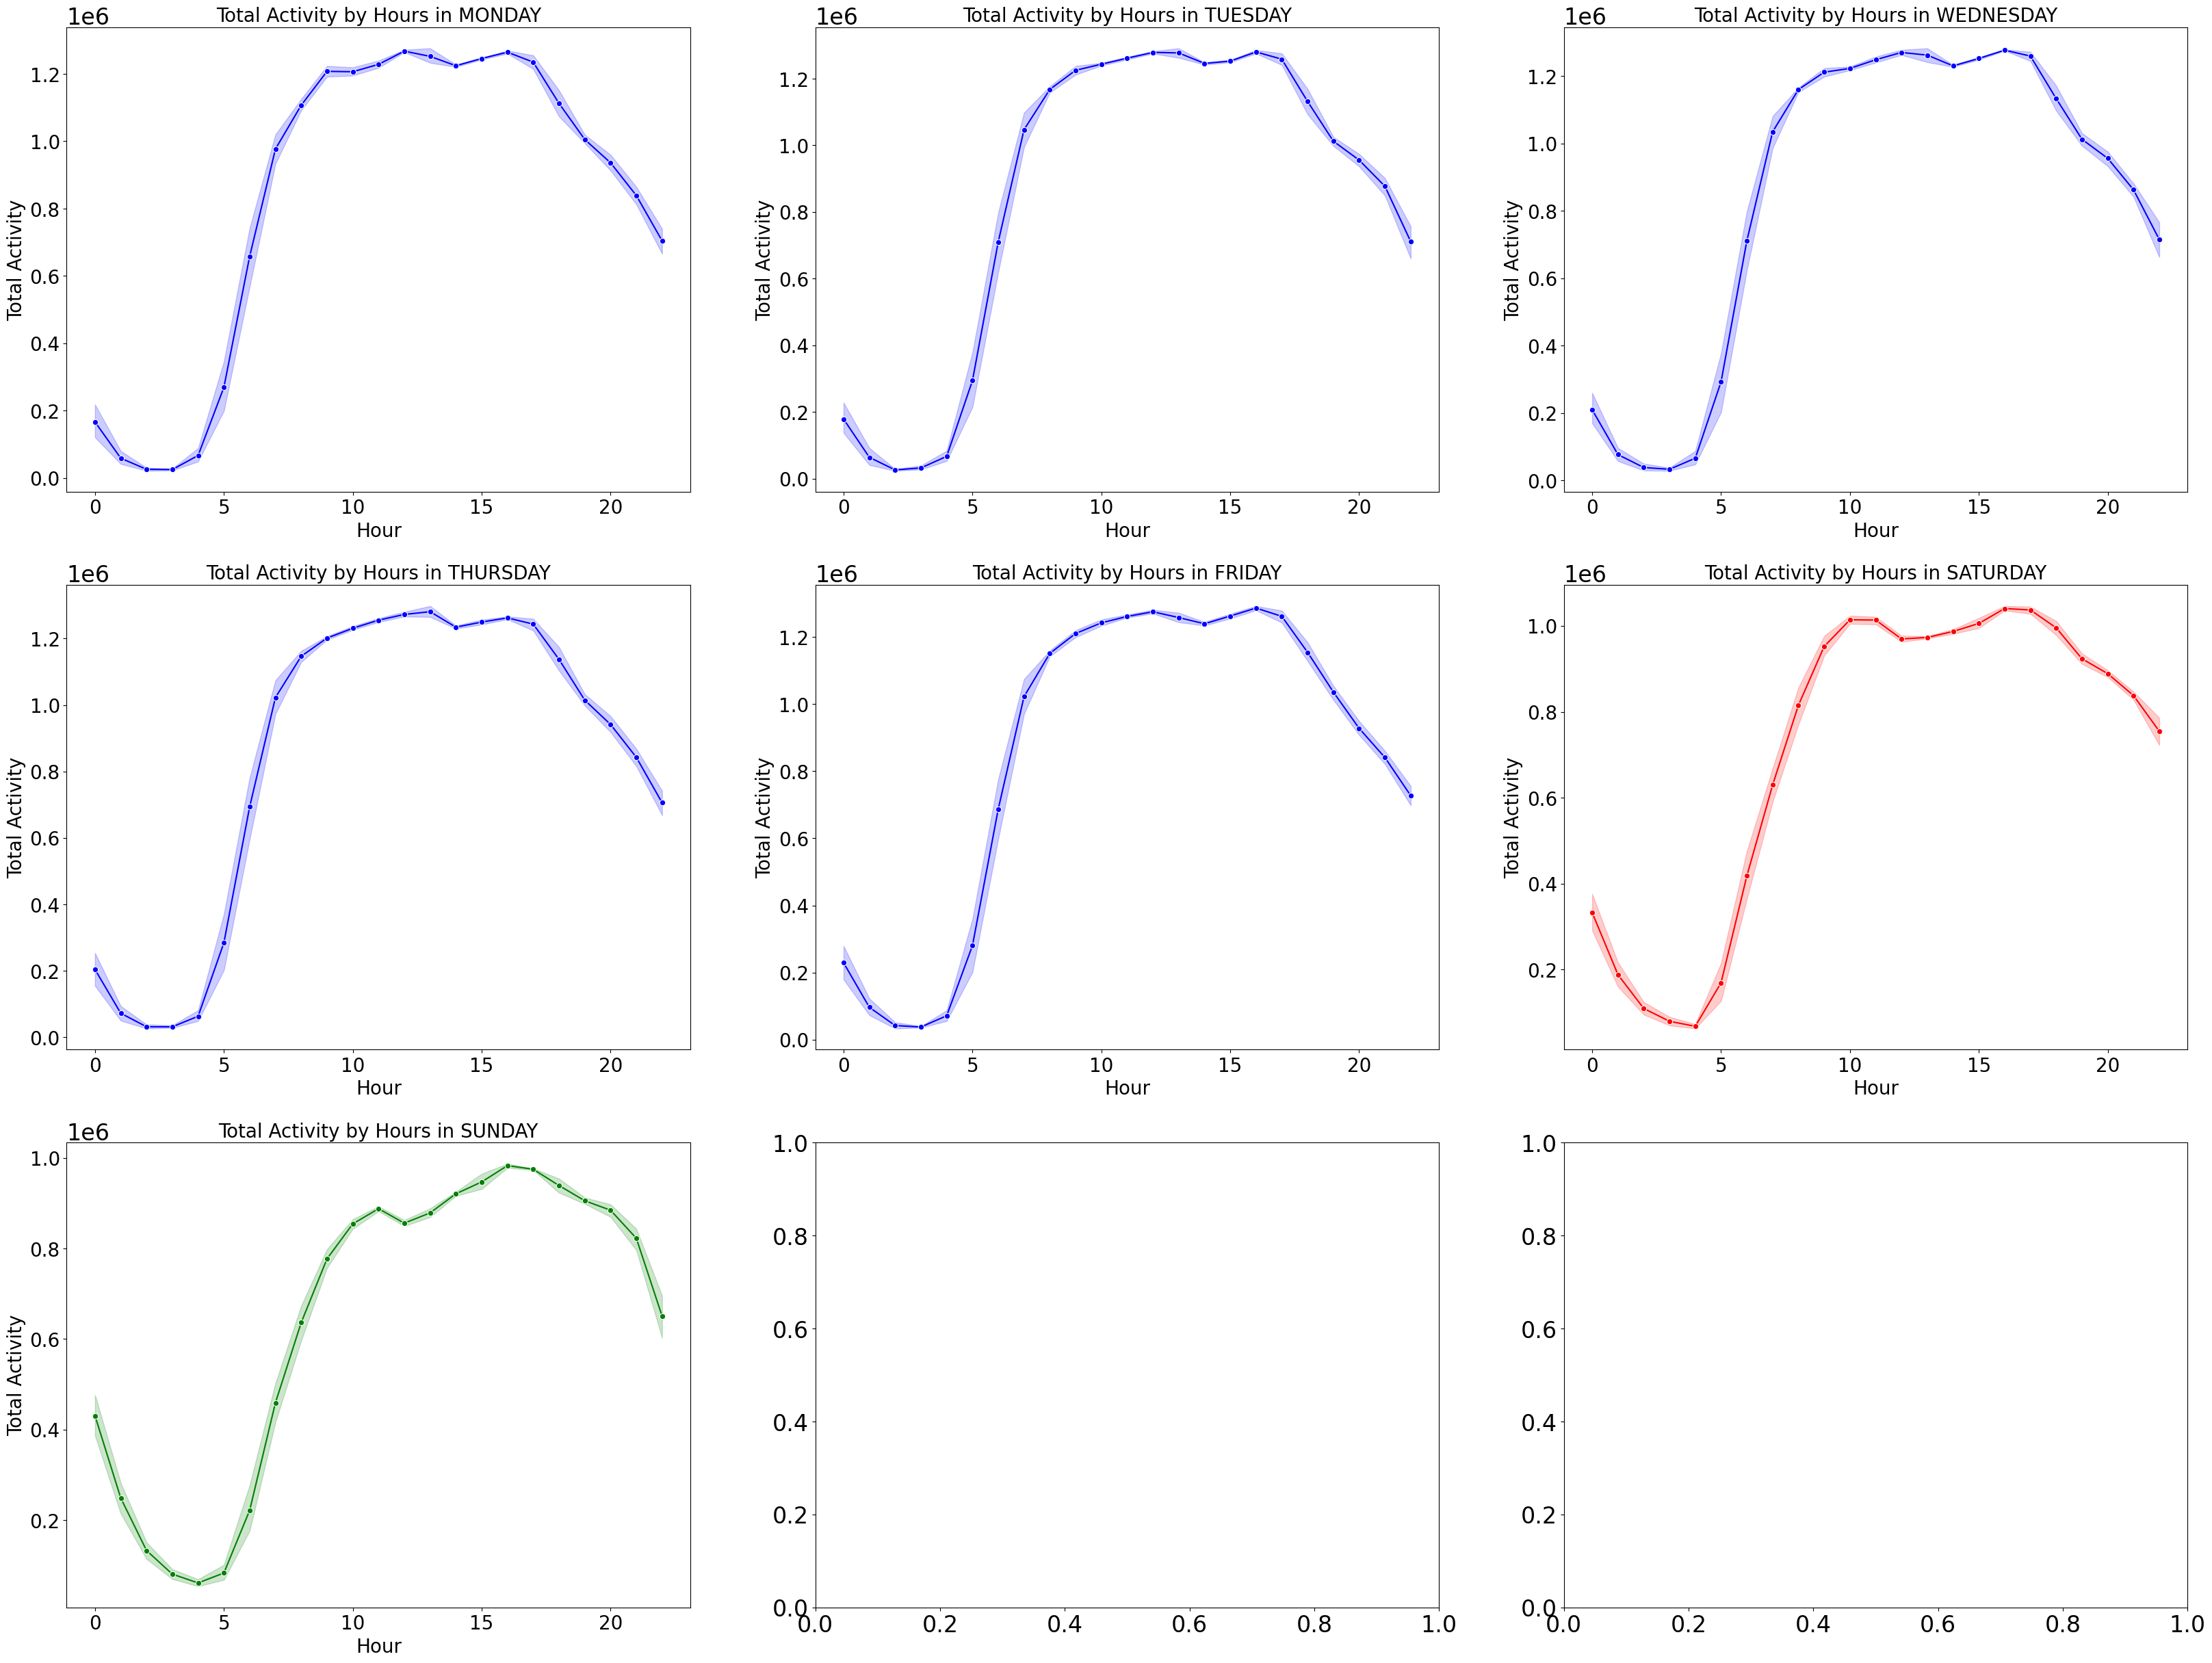

In [126]:
#Total Traffic Activity by hour for 7 days.
colors = ["b","b","b","b","b","r","g"]
fig,axs = plt.subplots(3,3,figsize = (40,30))
axs = axs.ravel()

for i,key in enumerate(datasets.keys()):
    df_clock = datasets[key].groupby(["datetime"]).sum()
    #Remove first 6 samples which belong to last day to get more robust plot.
    sns.lineplot(ax = axs[i],x = df_clock.index[6:].hour,y = df_clock.iloc[6:,7],c = colors[i],
                 marker = "o",linestyle = "-")
    
    axs[i].set_title(f"Total Activity by Hours in {key.upper()}",fontsize = 20)
    axs[i].set_xlabel("Hour",fontsize = 20)
    axs[i].set_ylabel("Total Activity",fontsize = 20)
    
    axs[i].xaxis.set_tick_params(labelsize = 20)
    axs[i].yaxis.set_tick_params(labelsize = 20)

plt.savefig("total_activity_hours.png")

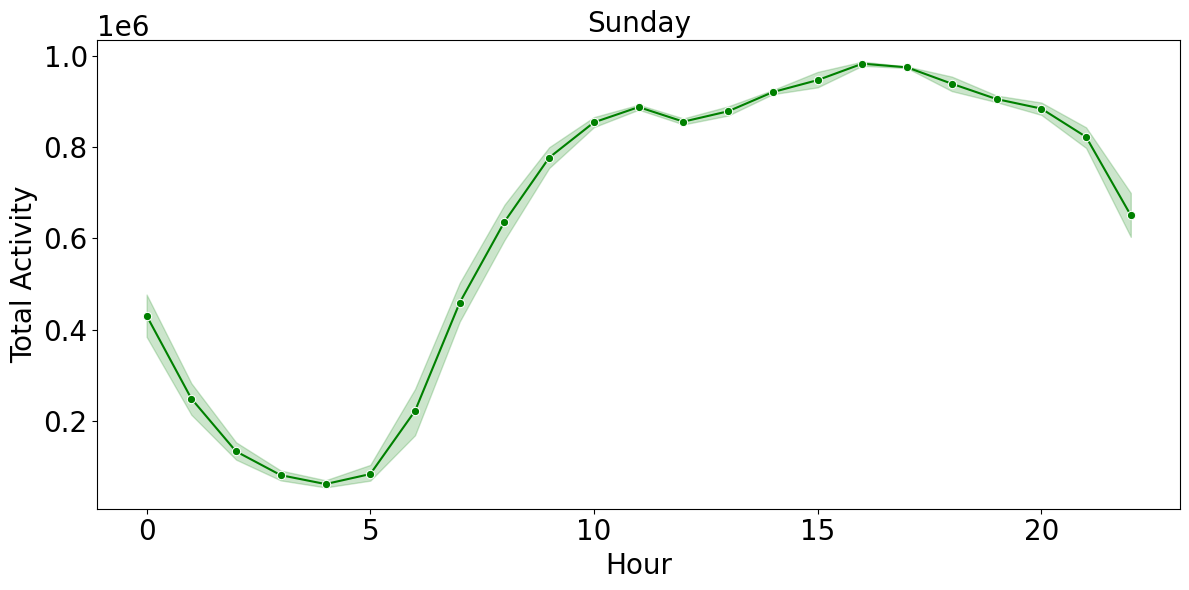

In [127]:
import matplotlib as mpl

label_size = 20
mpl.rcParams['xtick.labelsize'] = label_size
mpl.rcParams['ytick.labelsize'] = label_size
#Total activity by hours.
colors = ["b","b","b","b","b","r","g"]
fig = plt.figure(figsize = (12,6))
#Total activity by hours.
key = "sunday"
df_clock = datasets[key].groupby(["datetime"]).sum()

sns.lineplot(x = df_clock.index[6:].hour,y = df_clock.iloc[6:,7],c = colors[6],
                 marker = "o",linestyle = "-")
plt.title(f"Sunday",fontsize = 20)
plt.xlabel("Hour",fontsize = 20)
plt.ylabel("Total Activity",fontsize = 20)
    

plt.tight_layout()

plt.savefig(f"/kaggle/working/total_activity_hour_{key}")

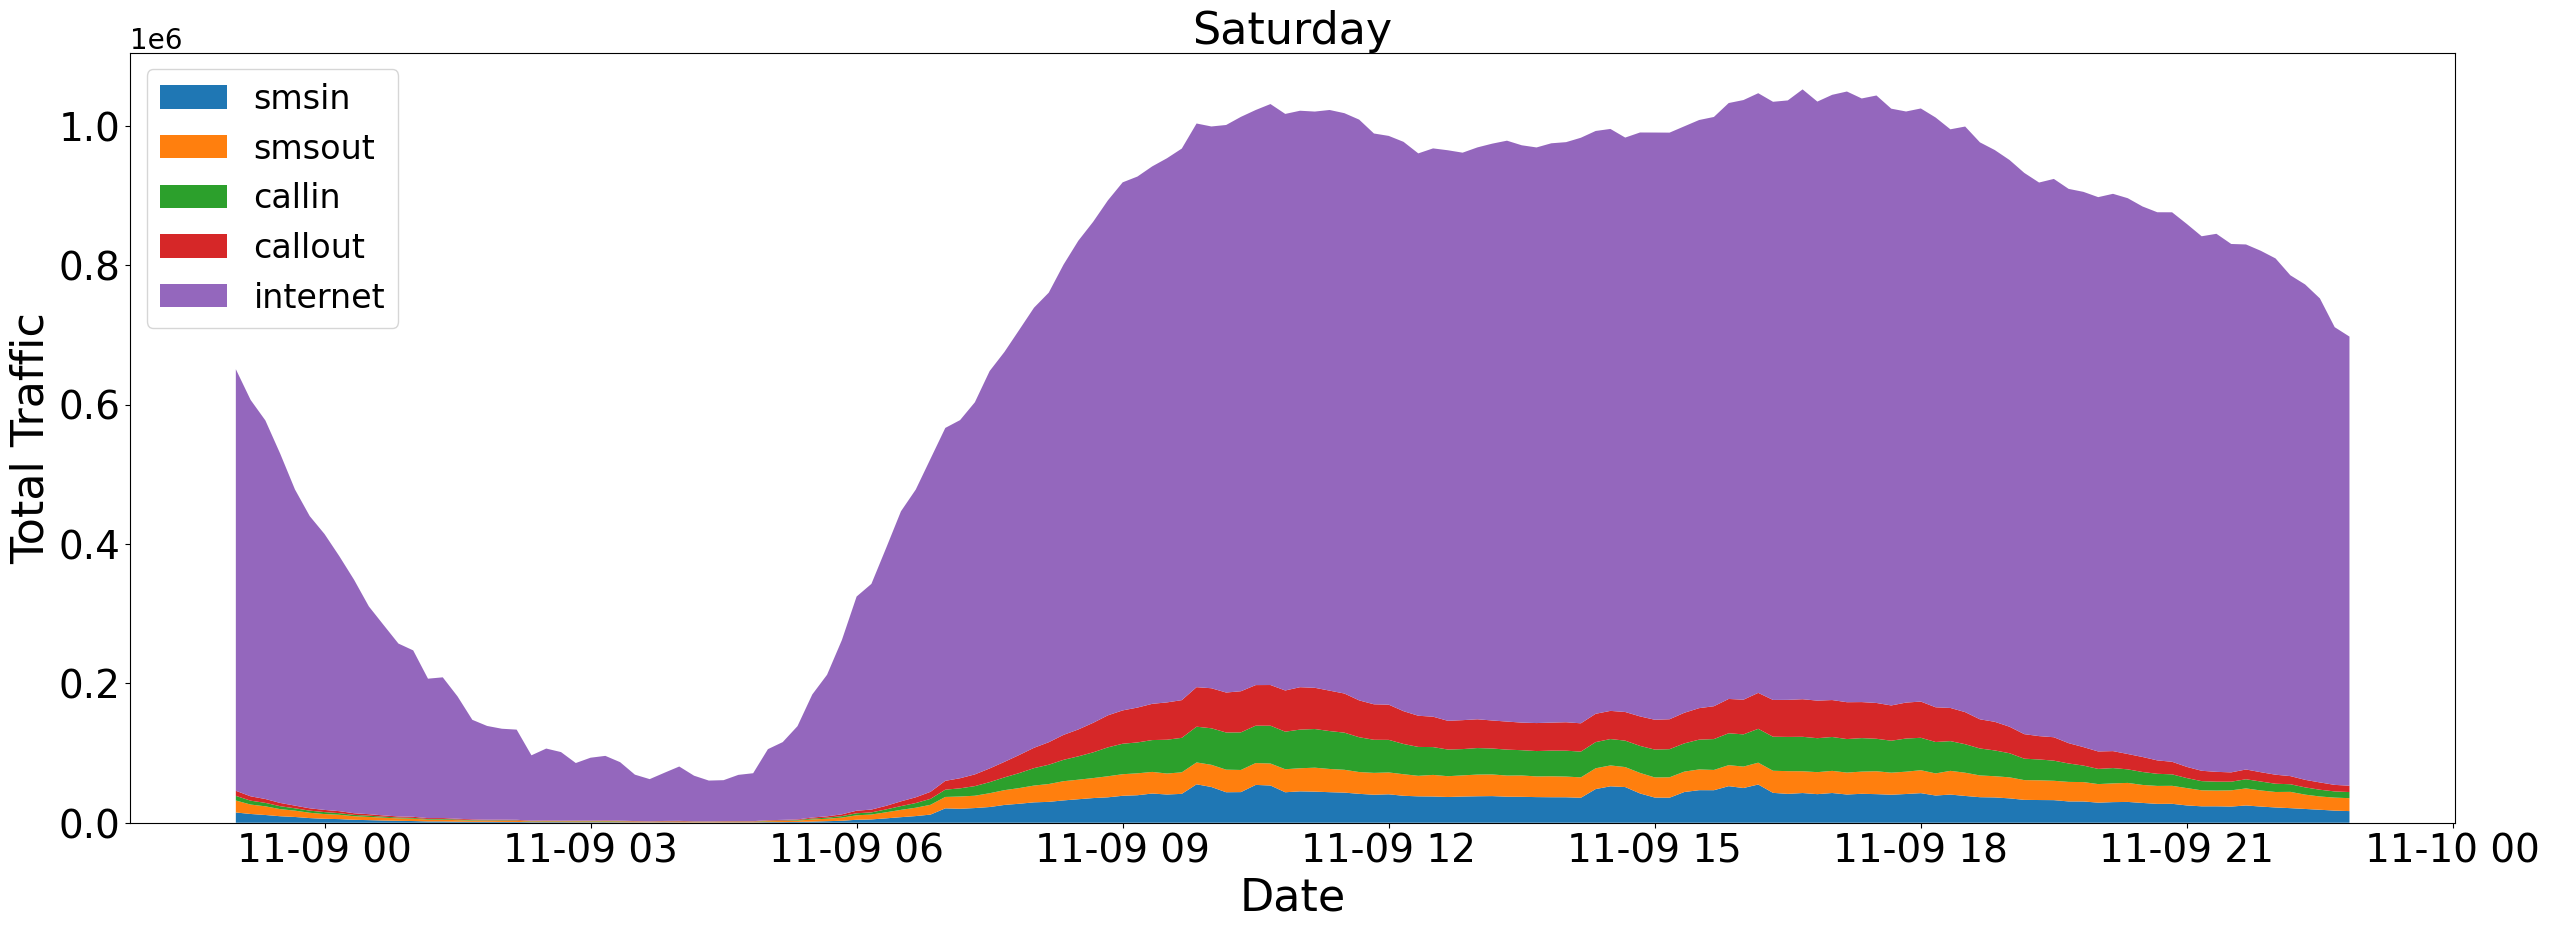

In [128]:
#TOTAL VOLUME OF SATURDAY BY HOURS
df_sat = datasets["saturday"].groupby(["datetime"]).sum()
import seaborn as sns
col = sns.color_palette("muted")
fig = plt.figure(figsize=(30,10))

ax = plt.stackplot(df_sat.index,df_sat["smsin"],df_sat["smsout"],
                  df_sat["callin"],df_sat["callout"],df_sat["internet"],
                   labels = ["smsin","smsout","callin","callout","internet"])

plt.legend(loc='upper left',fontsize = 24)
plt.xlabel('Date',fontsize = 32)
plt.ylabel('Total Traffic',fontsize = 32)
plt.title('Saturday',fontdict = {"fontsize" : 32})
plt.xticks(fontsize = 28)
plt.yticks(fontsize = 28)
plt.savefig("/kaggle/working/total_volume_saturday")
plt.show()


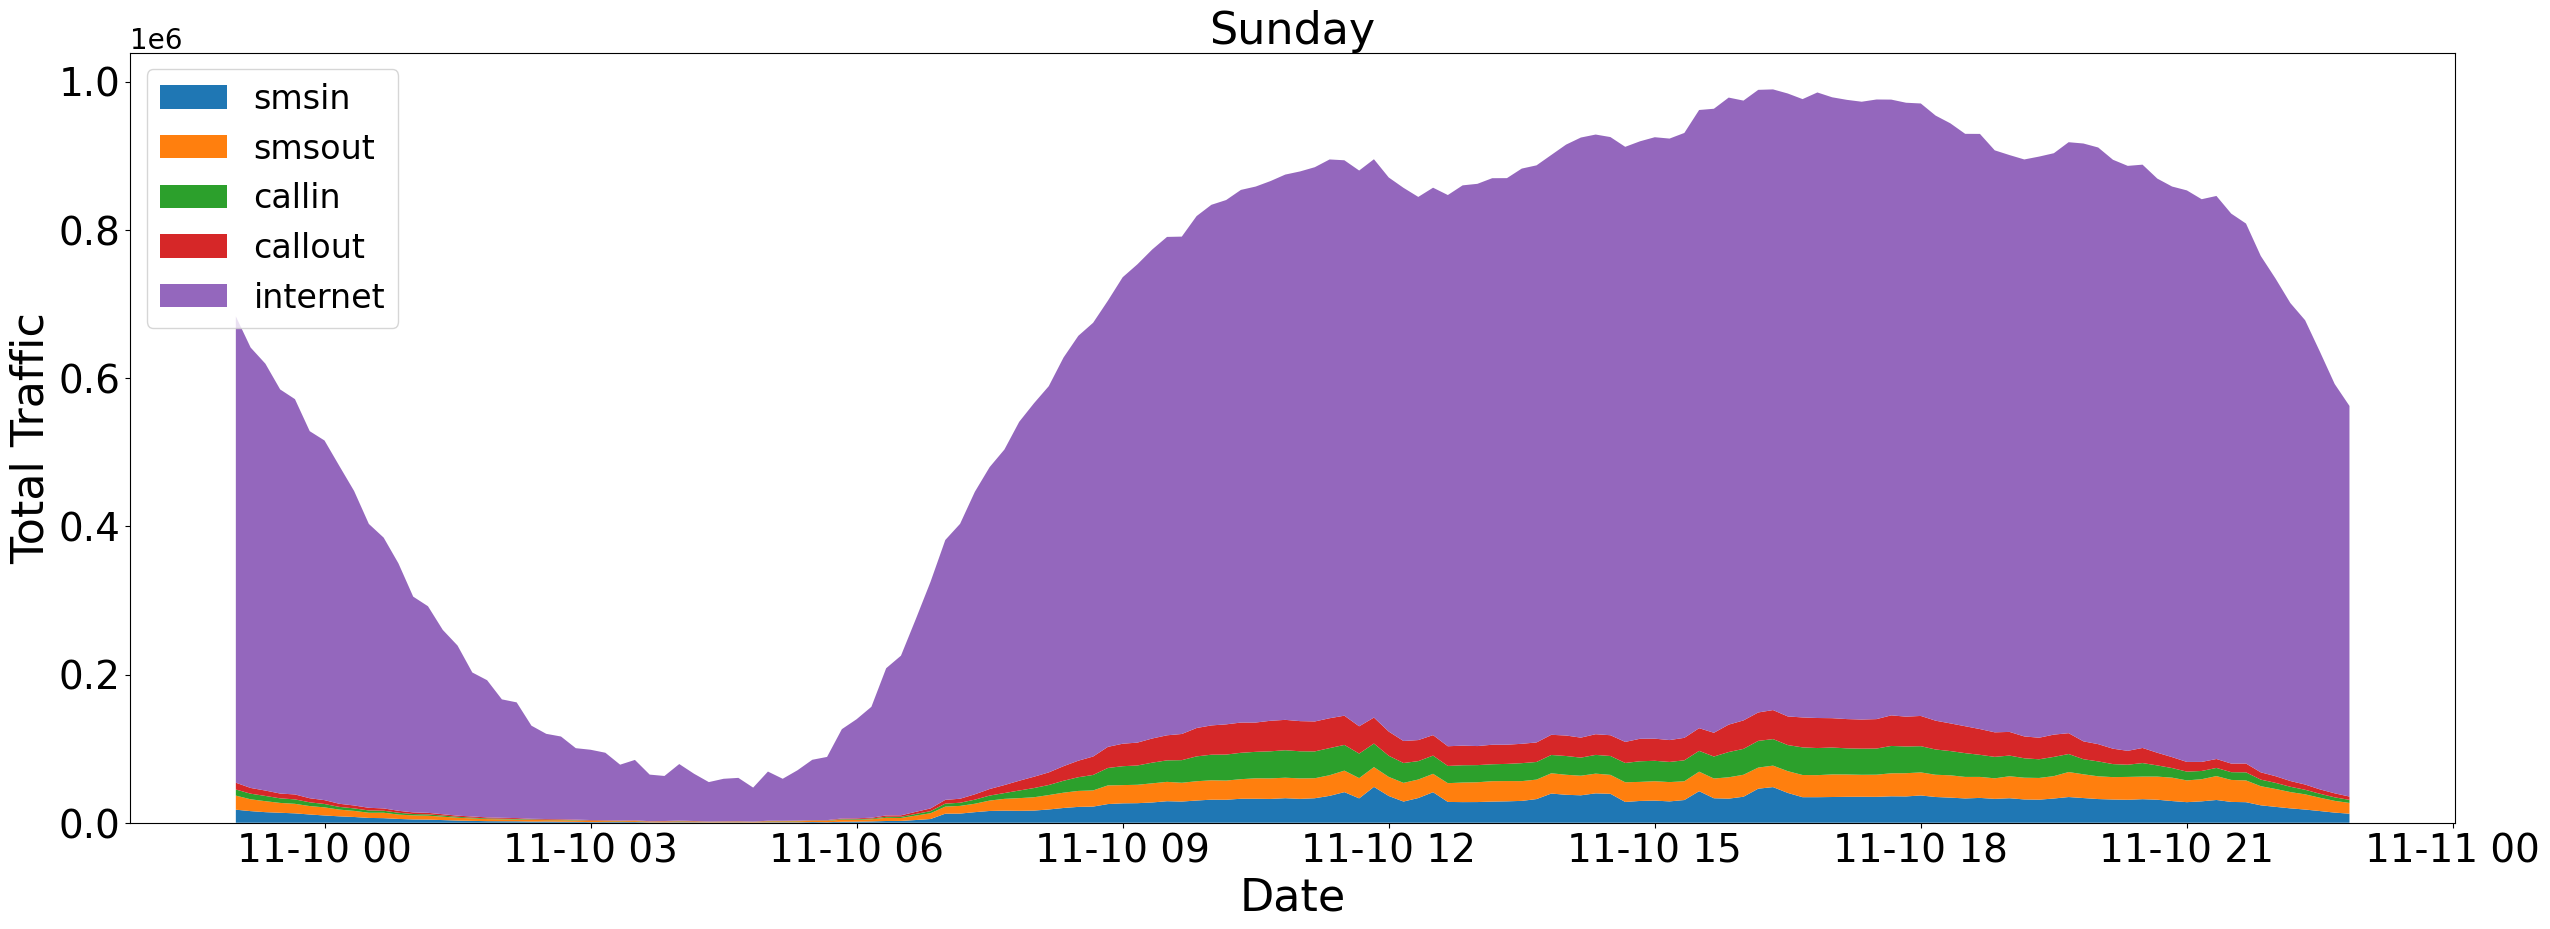

In [129]:
import matplotlib.pyplot as plt
#TOTAL VOLUME OF SUNDAY BY HOURS
df_sun = datasets["sunday"].groupby(["datetime"]).sum()
import seaborn as sns
col = sns.color_palette("muted")
plt.figure(figsize=(30,10))

ax = plt.stackplot(df_sun.index,df_sun["smsin"],df_sun["smsout"],
                  df_sun["callin"],df_sun["callout"],df_sun["internet"],
                   labels = ["smsin","smsout","callin","callout","internet"])

plt.legend(loc='upper left',fontsize = 24)
plt.xlabel('Date',fontsize = 32)
plt.ylabel('Total Traffic',fontsize = 32)
plt.title('Sunday',fontdict = {"fontsize" : 32})

plt.xticks(fontsize = 28)
plt.yticks(fontsize = 28)
plt.savefig("/kaggle/working/sunday_total_activity")


In [130]:
df_country_codes_weekly = pd.DataFrame()
for i in datasets.keys():
    df_country_codes = datasets[key].groupby(["countrycode"]).sum().sort_values("total_activity",ascending = False)
    df_country_codes_weekly = pd.concat([df_country_codes_weekly,df_country_codes])
    df_country_codes_weekly.drop(["CellID","traffic_level"],axis = 1,inplace = True)

/tmp/ipykernel_28/130745521.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_country_codes = datasets[key].groupby(["countrycode"]).sum().sort_values("total_activity",ascending = False)
/tmp/ipykernel_28/130745521.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_country_codes = datasets[key].groupby(["countrycode"]).sum().sort_values("total_activity",ascending = False)
/tmp/ipykernel_28/130745521.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns wh

In [131]:
df_country_codes_weekly.head(5)

smsin        smsout        callin       callout  \
countrycode                                                           
39           3.070324e+06  2.734675e+06  2.425590e+06  2.740540e+06   
41           3.043695e+02  2.436119e+02  1.289821e+02  1.614525e+02   
33           1.812496e+02  1.599948e+02  6.492155e+01  4.907253e+01   
86           9.395846e+01  6.068933e+01  4.318021e+01  6.299825e+01   
7            1.776570e+01  1.659620e+01  8.257098e+00  5.568724e+00   

                 internet  total_activity  
countrycode                                
39           8.048290e+07    9.145402e+07  
41           4.740104e+02    1.312426e+03  
33           1.316771e+02    5.869156e+02  
86           8.049743e+01    3.413237e+02  
7            1.135779e+01    5.954551e+01

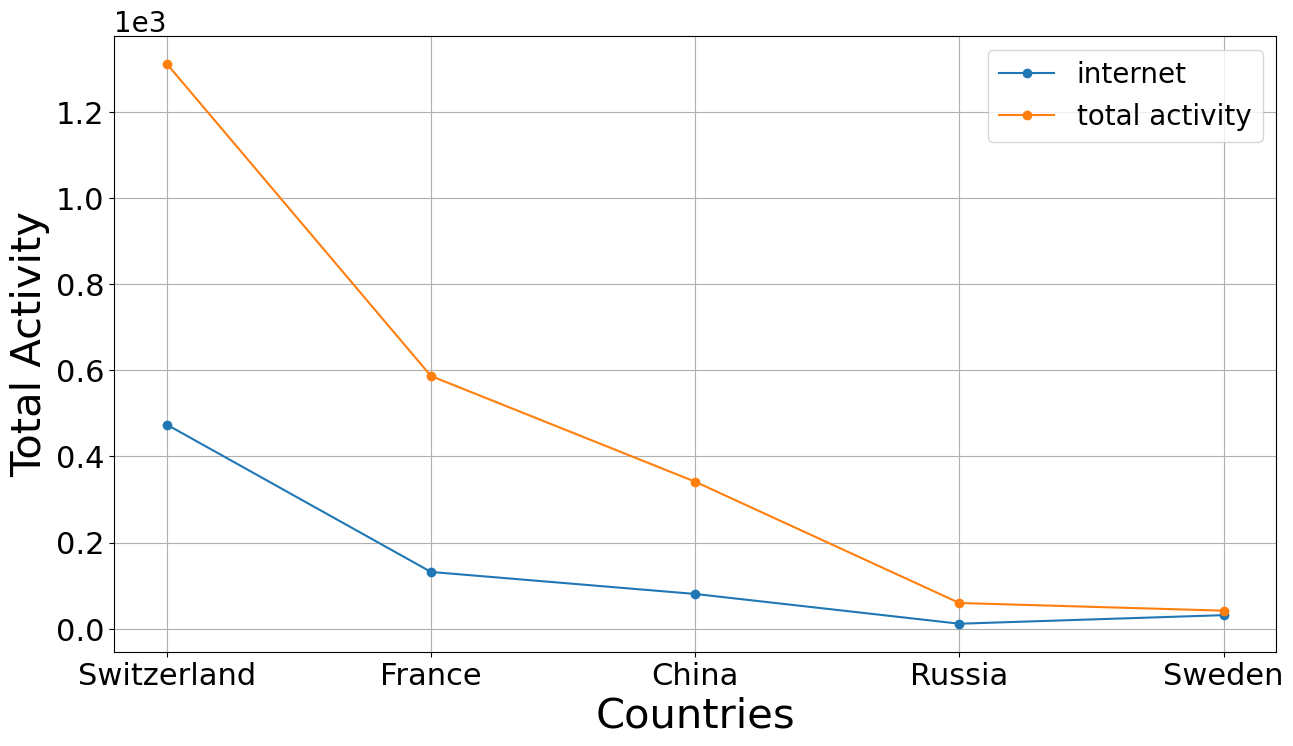

In [132]:
#MOST TOTAL ACTIVITIES BY COUNTRY CODES
fig,ax= plt.subplots(figsize = (15,8))
ax.grid()

corresponding_codes = {41 : "Switzerland",33 : "France",86 : "China",7 : "Russia",46 : "Sweden"}
countries = corresponding_codes.values()

plt.plot(countries,
         df_country_codes_weekly.iloc[1:6,4:],marker = "o")

plt.ylabel("Total Activity",fontsize = 30)
plt.xlabel("Countries",fontsize = 30)

plt.legend(labels = ["internet","total activity"],fontsize = 20)
plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)

plt.ticklabel_format(style='sci',scilimits=(3,3),axis='y')
plt.savefig("/kaggle/working/total_activity_country")


# FEATURE EXTRACTION AND DATA PROCESSING

/tmp/ipykernel_28/1243979868.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_results = datasets["monday"].corr()


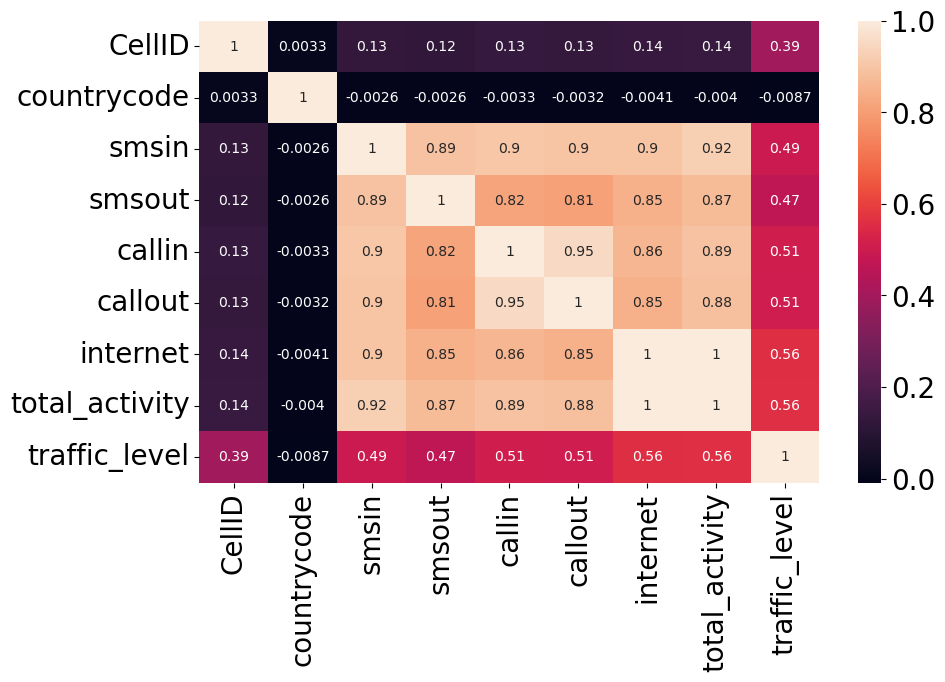

In [133]:
corr_results = datasets["monday"].corr()
fig = plt.figure(figsize = (10,6))
sns.heatmap(corr_results,annot = True)
plt.show()

# TRAIN,TEST,VALIDATION DATASETS 

In [134]:
from sklearn.preprocessing import StandardScaler
import keras

def data_preprocessing(day):
    #Drop datetime column
    datasets[day].drop(["datetime"],axis = 1,inplace = True)
    #Drop country codes column as a result of correlation map.
    datasets[day].drop(["countrycode"],axis = 1,inplace = True)
    #Standardization of data by removing mean and scale to unit variance
    SS = StandardScaler()
    scaled_day = SS.fit_transform(datasets[day].iloc[:,:-1].astype("int32"))
    #Target variable => Traffic level
    target_y = datasets[day].iloc[:,-1:]
    #Convert traffic level to one hot encoding.
    traffic_level_day = keras.utils.np_utils.to_categorical(target_y)
    return scaled_day,traffic_level_day

In [135]:
#Day by day processed data and targets
scaled_days = dict.fromkeys(["monday","tuesday","wednesday","thursday","friday","saturday","sunday"])
traffic_levels = dict.fromkeys(["monday","tuesday","wednesday","thursday","friday","saturday","sunday"])

for day in scaled_days.keys():
    scaled_days[day],traffic_levels[day] = data_preprocessing(day)


In [136]:
#Day by day train,test data and targets.
X_train_days = dict.fromkeys(["monday","tuesday","wednesday","thursday","friday","saturday","sunday"])
X_test_days = dict.fromkeys(["monday","tuesday","wednesday","thursday","friday","saturday","sunday"])

Y_train_levels = dict.fromkeys(["monday","tuesday","wednesday","thursday","friday","saturday","sunday"])
Y_test_levels = dict.fromkeys(["monday","tuesday","wednesday","thursday","friday","saturday","sunday"])
#Split dataset as train and test by %60 to %40.
from sklearn.model_selection import train_test_split

for day in X_train_days.keys():
    X_train_days[day],X_test_days[day],Y_train_levels[day],Y_test_levels[day] = train_test_split(
                                                             scaled_days[day],
                                                             traffic_levels[day],test_size = 0.4,
                                                             random_state = 42,shuffle = True)
    #Add channel for convolution
    X_train_days[day] = np.expand_dims(X_train_days[day],axis = -1)
    X_test_days[day] = np.expand_dims(X_test_days[day],axis = -1)

In [137]:
#Day by day test,validation data and targets.
X_val_days = dict.fromkeys(["monday","tuesday","wednesday","thursday","friday","saturday","sunday"])
Y_val_levels = dict.fromkeys(["monday","tuesday","wednesday","thursday","friday","saturday","sunday"])

#Split test dataset as test and validation by %20 to %20.
for day in X_test_days.keys():
    X_test_days[day],X_val_days[day],Y_test_levels[day],Y_val_levels[day] = train_test_split(
                                            X_test_days[day],Y_test_levels[day],test_size = 0.5,
                                            random_state = 42,shuffle = False)


# DEEP LEARNING for EACH DAY

In [138]:
import tensorflow as tf
import keras

**CONVOLUTION MODEL**

In [139]:
import keras
from keras.models import Sequential
from keras.layers import Conv1D,Flatten,Dropout,Dense
def build_model():
    model = Sequential()
    #Input layer
    model.add(Conv1D(16,3,activation = "relu",kernel_initializer = "normal",input_shape = (7,1)))
    #Hidden layer 1
    model.add(Conv1D(32,3,activation = "relu",kernel_initializer = "normal"))
    #Dropout 1
    model.add(Dropout(0.3))
    #Hidden layer 2
    model.add(Conv1D(64,3,activation = "relu",kernel_initializer = "normal"))
    #Dropout 2
    model.add(Dropout(0.3))
    #Flatten
    model.add(Flatten())
    #Fully connected layer
    model.add(Dense(32,activation = "relu",kernel_initializer = "normal"))
    #Output layer
    model.add(Dense(7,activation = "softmax",kernel_initializer = "normal"))
    return model

In [102]:
Y_train_levels["monday"].shape

(649581, 7)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization
def build_model():
    model = Sequential()
    #Input Layer
    model.add(Dense(units = 8, input_dim=7, kernel_initializer='normal', activation='relu'))
    #Hidden Layer 1
    model.add(Dense(units = 4, kernel_initializer='normal', activation='relu'))
    #Hidden Layer 2
    model.add(Dense(units = 3, kernel_initializer='normal', activation='tanh'))
    #Output layer
    model.add(Dense(units = 7, kernel_initializer='normal', activation='softmax'))
    return model

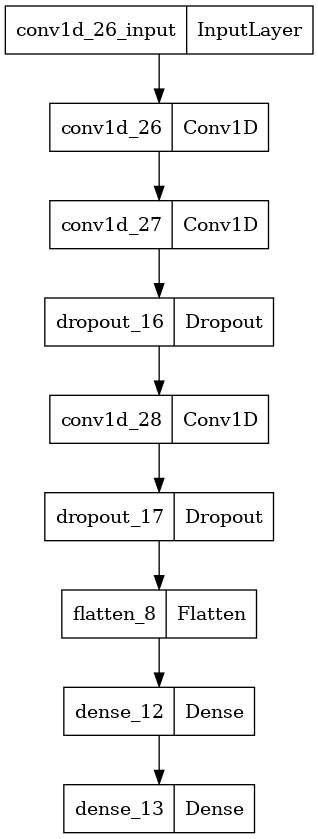

In [71]:
keras.utils.vis_utils.plot_model(build_model())

In [72]:
build_model()

In [36]:
!pip install git+https://github.com/paulgavrikov/visualkeras

  Cloning https://github.com/paulgavrikov/visualkeras to /tmp/pip-req-build-ghwnpnvw
  Running command git clone --filter=blob:none --quiet https://github.com/paulgavrikov/visualkeras /tmp/pip-req-build-ghwnpnvw
  Resolved https://github.com/paulgavrikov/visualkeras to commit cd169b81be347e2090353ad6fe2bd2e1f4020cf4
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 13.4 MB/s eta 0:00:0000:0100:01
  Created wheel for visualkeras: filename=visualkeras-0.0.2-py3-none-any.whl size=13737 sha256=8fdce702f5540bdf37a0d03cc1d325aebdada9ba76a3ad6fafdeaa54b494d560
  Stored in directory: /tmp/pip-ephem-wheel-cache-vaptt92_/wheels/89/d3/c2/937382b33c09192fc84331bbc02c4565d62aeae67e9684c37e
Successfully built visualkeras


# VISUALIZATION OF CNN

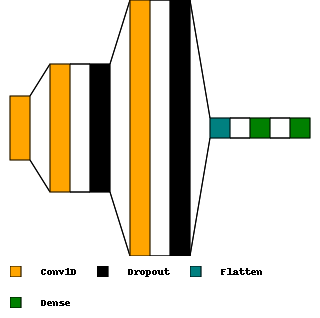

In [140]:
from collections import defaultdict
import visualkeras
from PIL import ImageFont
from collections import defaultdict

color_map = defaultdict(dict)
color_map[Conv1D]['fill'] = 'orange'
color_map[Dropout]['fill'] = 'black'
color_map[Dense]['fill'] = 'green'
color_map[Flatten]['fill'] = 'teal'

import visualkeras
visualkeras.layered_view(build_model(),legend = True,draw_volume = False,spacing = 20,
                        color_map = color_map,to_file = "/kaggle/working/conv_architecture.png")

In [141]:
#A model for each day.
model_days = dict.fromkeys(["monday","tuesday","wednesday","thursday","friday","saturday","sunday"])
for day in model_days.keys():
    model_days[day] = build_model()

In [142]:
model_days

{'monday': <keras.engine.sequential.Sequential at 0x7c8697715600>,
 'tuesday': <keras.engine.sequential.Sequential at 0x7c8699c534c0>,
 'wednesday': <keras.engine.sequential.Sequential at 0x7c86c3e75600>,
 'thursday': <keras.engine.sequential.Sequential at 0x7c86c5977370>,
 'friday': <keras.engine.sequential.Sequential at 0x7c8699bebb50>,
 'saturday': <keras.engine.sequential.Sequential at 0x7c86c3e97dc0>,
 'sunday': <keras.engine.sequential.Sequential at 0x7c86c3ebbd60>}

In [143]:
#Compile each model
for day in model_days.keys():
    model_days[day].compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
             loss = "categorical_crossentropy",
             metrics = ["accuracy"])


# TRAIN MODEL

In [144]:
history_days = dict.fromkeys(["monday","tuesday","wednesday","thursday","friday","saturday","sunday"])
for day in history_days.keys():
    print(f"{day.upper()} \n")
    history_days[day] = model_days[day].fit(X_train_days[day],Y_train_levels[day],epochs = 10,
                                batch_size = 256,validation_data = (X_val_days[day],Y_val_levels[day]),
                        callbacks = keras.callbacks.EarlyStopping(monitor = "val_loss",patience = 3))

MONDAY 

Epoch 1/10
2538/2538 [==============================] - 25s 6ms/step - loss: 0.1714 - accuracy: 0.9321 - val_loss: 0.1083 - val_accuracy: 0.9483
Epoch 2/10
2538/2538 [==============================] - 15s 6ms/step - loss: 0.0966 - accuracy: 0.9632 - val_loss: 0.0826 - val_accuracy: 0.9739
Epoch 3/10
2538/2538 [==============================] - 14s 5ms/step - loss: 0.0863 - accuracy: 0.9673 - val_loss: 0.0683 - val_accuracy: 0.9720
Epoch 4/10
2538/2538 [==============================] - 14s 6ms/step - loss: 0.0771 - accuracy: 0.9711 - val_loss: 0.0308 - val_accuracy: 0.9872
Epoch 5/10
2538/2538 [==============================] - 14s 5ms/step - loss: 0.0751 - accuracy: 0.9721 - val_loss: 0.0557 - val_accuracy: 0.9760
Epoch 6/10
2538/2538 [==============================] - 15s 6ms/step - loss: 0.0710 - accuracy: 0.9739 - val_loss: 0.0258 - val_accuracy: 0.9935
Epoch 7/10
2538/2538 [==============================] - 14s 5ms/step - loss: 0.0640 - accuracy: 0.9765 - val_loss: 0.0681

In [145]:
evaluate_results = dict.fromkeys(["monday","tuesday","wednesday","thursday","friday","saturday","sunday"])
for day in evaluate_results.keys():
    evaluate_results[day] = model_days[day].evaluate(X_test_days[day],Y_test_levels[day])

6575/6575 [==============================] - 19s 3ms/step - loss: 0.0193 - accuracy: 0.9934


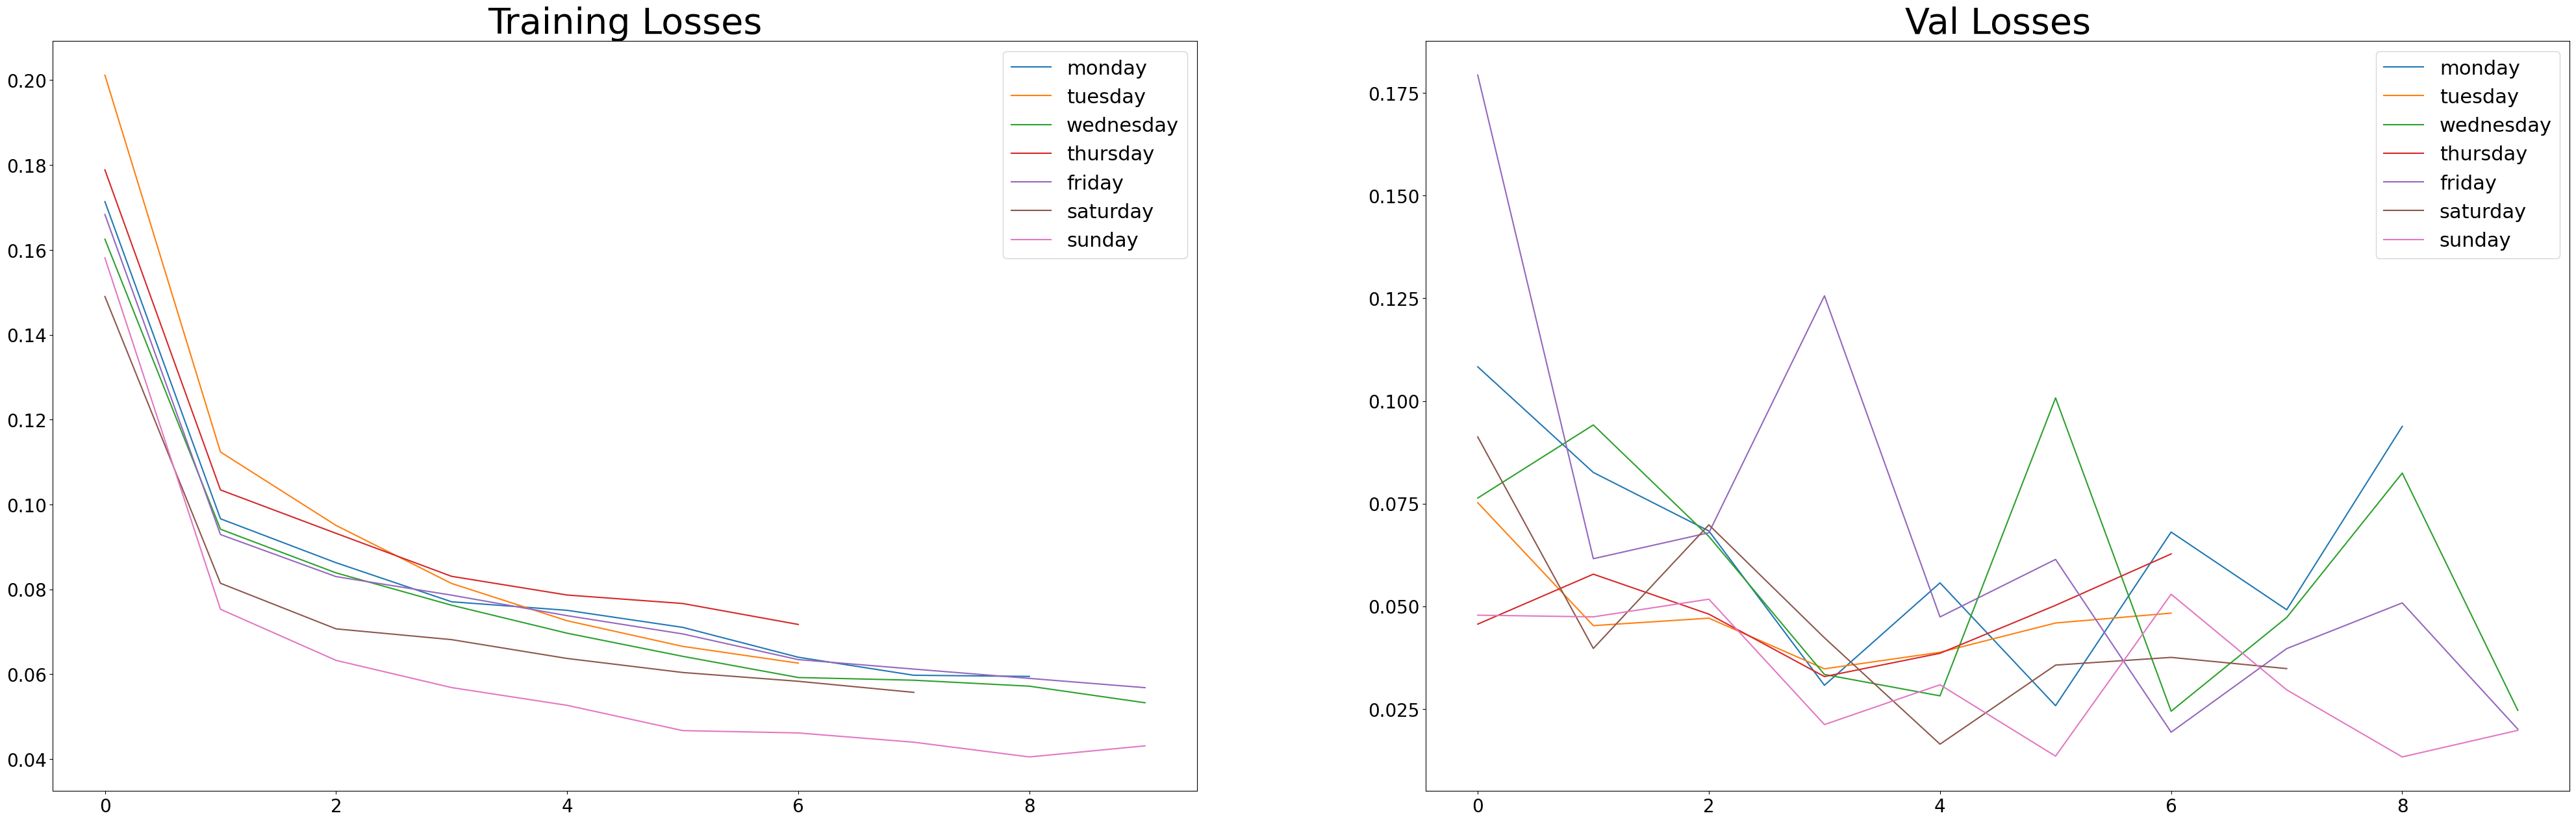

In [146]:
#PLOT TRAINING LOSS AND VAL LOSS BY DAYS
plt.figure(figsize = (50,15))
plt.rcParams.update({'font.size': 22})

for i,day in enumerate(history_days.keys()):
    plt.subplot(1,2,1)
    plt.plot(history_days[day].history["loss"])
    plt.legend(["monday","tuesday","wednesday","thursday","friday","saturday","sunday"])
    plt.title("Training Losses",fontdict={"fontsize" : 40})
    
    
    plt.subplot(1,2,2)
    plt.plot(history_days[day].history["val_loss"])
    plt.legend(["monday","tuesday","wednesday","thursday","friday","saturday","sunday"])
    plt.title("Val Losses",fontdict = {"fontsize" : 40})
    


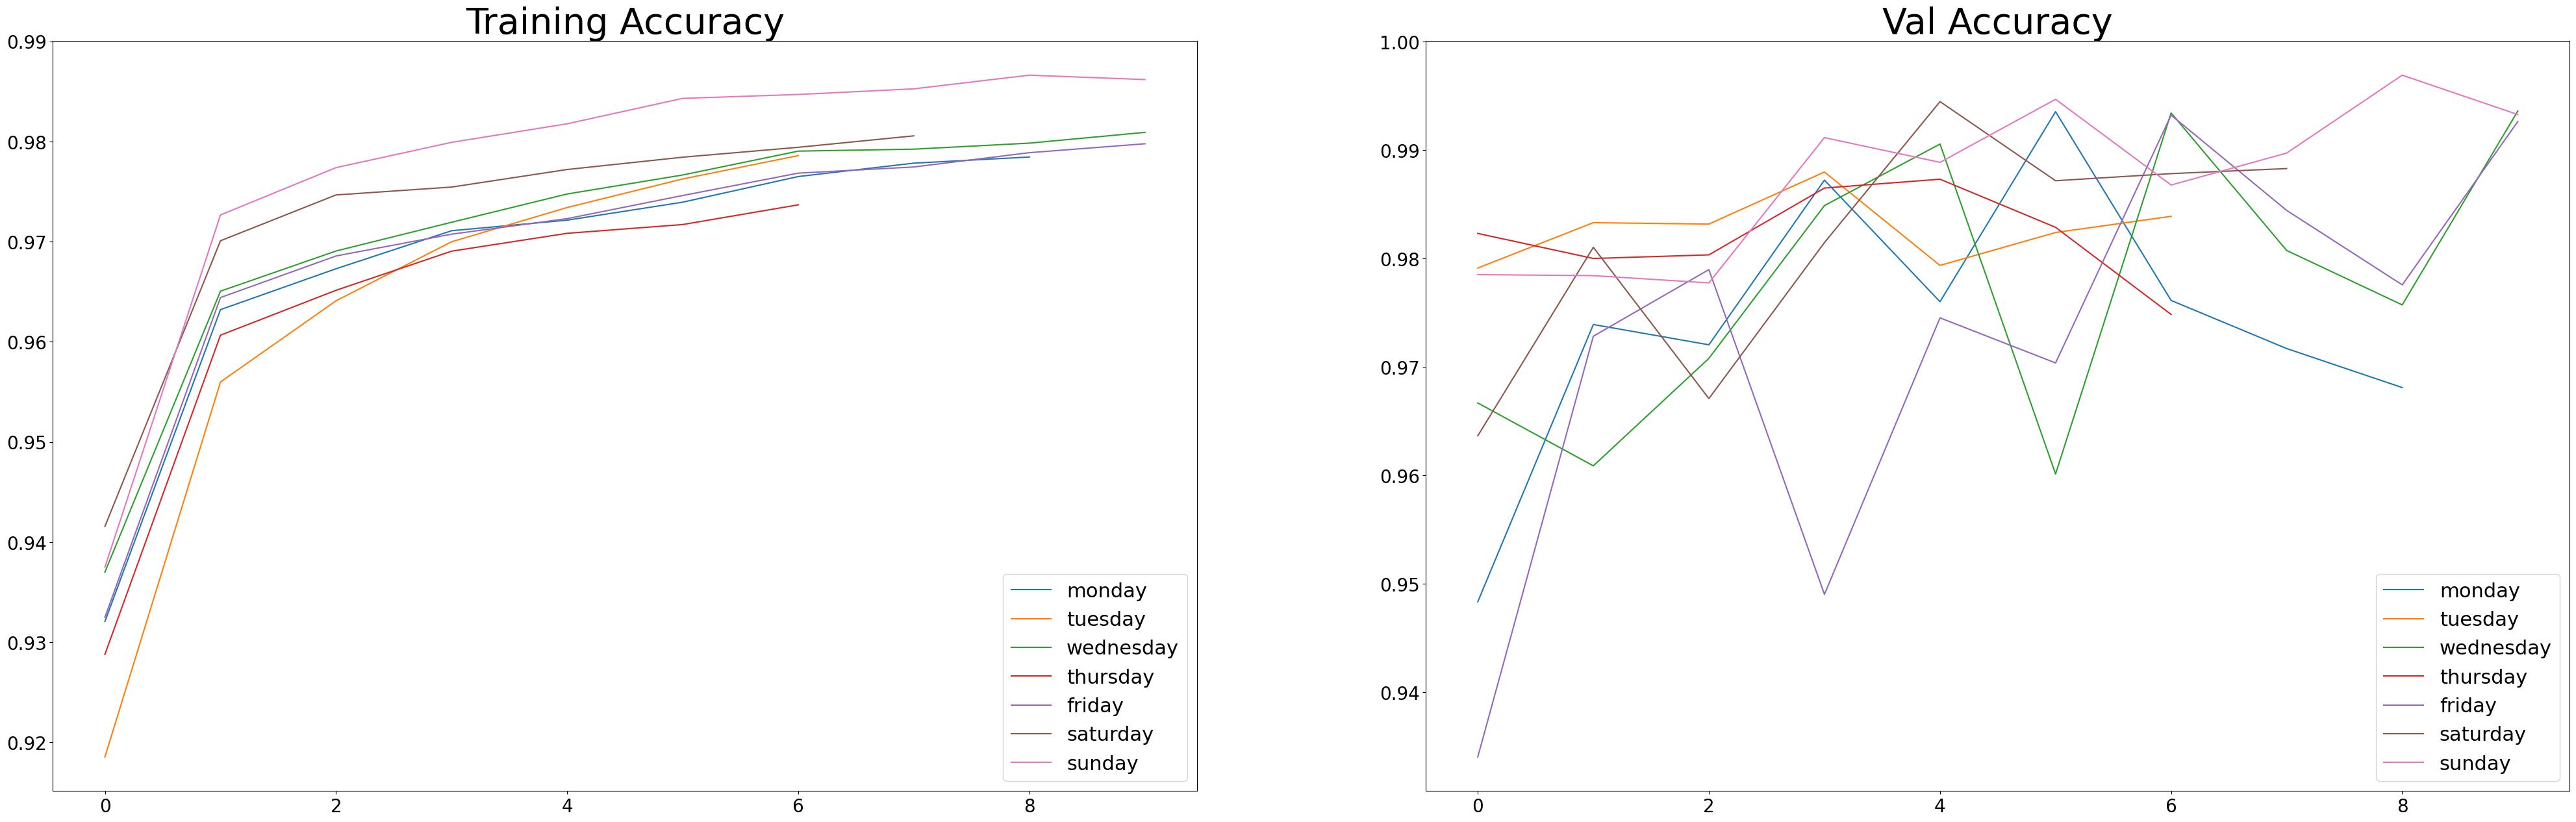

In [147]:
#PLOT TRAINING ACCURACY AND VAL LOSS BY DAYS
plt.figure(figsize = (50,15))
plt.rcParams.update({'font.size': 22})

for i,day in enumerate(history_days.keys()):
    plt.subplot(1,2,1)
    plt.plot(history_days[day].history["accuracy"])
    plt.legend(["monday","tuesday","wednesday","thursday","friday","saturday","sunday"])
    plt.title("Training Accuracy",fontdict={"fontsize" : 40})
    
    
    plt.subplot(1,2,2)
    plt.plot(history_days[day].history["val_accuracy"])
    plt.legend(["monday","tuesday","wednesday","thursday","friday","saturday","sunday"])
    plt.title("Val Accuracy",fontdict = {"fontsize" : 40})
    
    

# MODEL WEIGHTS for EACH DAY

In [ ]:
for day in model_days.keys():
    model_days[day].save_weights(f"/kaggle/working/conv_{day}.h5")

# PREDICTION

In [148]:
preds_days = dict.fromkeys(["monday","tuesday","wednesday","thursday","friday","saturday","sunday"])
for day in preds_days.keys():
    preds_days[day] = model_days[day].predict(X_test_days[day])

6575/6575 [==============================] - 13s 2ms/step


In [149]:
#DECODE PREDICTIONS FROM ONE HOT ENCODING TO LABELS.
pred_labels_days = dict.fromkeys(["monday","tuesday","wednesday","thursday","friday","saturday","sunday"])
y_test_labels_days = dict.fromkeys(["monday","tuesday","wednesday","thursday","friday","saturday","sunday"])

for day in pred_labels_days.keys():
    pred_labels_days[day] = [np.argmax(preds_days[day][i])for i in range(len(preds_days[day]))]
    y_test_labels_days[day] = [np.argmax(Y_test_levels[day][i])for i in range(len(Y_test_levels[day]))]

In [150]:
result_days = dict.fromkeys(["monday","tuesday","wednesday","thursday","friday","saturday","sunday"])

#Convert pred values numpy to dataframe for comparision with real traffic levels.
for day in result_days.keys():
    preds_df = pd.DataFrame(pred_labels_days[day],columns = ["pred_traffic_levels"])
    test_levels = pd.DataFrame(y_test_labels_days[day],columns = ["real_traffic_levels"])
    #Concatenate two df
    result_days[day] = pd.concat([test_levels,preds_df],axis = 1)

In [151]:
result_days["monday"].head(5)

real_traffic_levels  pred_traffic_levels
0                    6                    6
1                    1                    1
2                    2                    2
3                    2                    2
4                    3                    3

In [152]:
#CLASSIFICATION REPORT FOR EACH DAY
from sklearn.metrics import classification_report

for day in result_days.keys():
    print(f"{day.upper()} {classification_report(y_test_labels_days[day],pred_labels_days[day],digits = 4)} \n")

MONDAY               precision    recall  f1-score   support

           1     1.0000    0.9473    0.9729     53904
           2     0.9316    0.9592    0.9452     40355
           3     0.9425    0.9685    0.9553     28799
           4     0.9197    0.9973    0.9569     20503
           5     0.9999    0.8929    0.9434     13403
           6     0.9907    1.0000    0.9953     59563

    accuracy                         0.9682    216527
   macro avg     0.9641    0.9609    0.9615    216527
weighted avg     0.9694    0.9682    0.9682    216527
 

TUESDAY               precision    recall  f1-score   support

           1     0.9555    0.9992    0.9769     54431
           2     0.9892    0.9350    0.9613     39345
           3     0.9967    0.9873    0.9920     29024
           4     0.9870    0.9907    0.9888     20535
           5     0.9848    0.9800    0.9824     13313
           6     0.9999    0.9987    0.9993     60571

    accuracy                         0.9839    217219
   mac

In [153]:
result_days["friday"].head(10)

real_traffic_levels  pred_traffic_levels
0                    6                    6
1                    4                    4
2                    5                    5
3                    3                    3
4                    5                    5
5                    6                    6
6                    2                    2
7                    2                    2
8                    2                    2
9                    4                    4

# DEEP LEARNING for ALL DAYS IN ONCE

In [154]:
#CONCATENATE ALL DATA
all_data = pd.concat([datasets["monday"],datasets["tuesday"],datasets["wednesday"],
                     datasets["thursday"],datasets["friday"],datasets["saturday"],
                     datasets["sunday"]],axis = 0)

In [155]:
all_data

CellID     smsin    smsout    callin   callout   internet  \
1             1  0.026137  0.030875  0.026137  0.055225   9.260190   
3             1  0.027925  0.027925  0.001787  0.054601   8.669007   
9             1  0.404855  0.218404  0.001787  0.027300   8.812707   
38            1  0.058176  0.058176  0.052275  0.003575   5.516062   
40            1  0.003575  0.001787  0.001787  0.034450   4.947367   
...         ...       ...       ...       ...       ...        ...   
4731571    9999  0.361443  0.793338  0.230476  0.668570  37.340198   
4731573    9999  0.591068  1.662999  0.144481  0.520648  31.362719   
4731576    9999  0.419945  0.707343  0.260757  0.260757  36.279857   
4731578    9999  0.085995  0.574455  0.085995  0.424952  39.824503   
4731581    9999  0.346751  0.553518  0.171990  0.151053  27.247603   

         total_activity  traffic_level  
1              9.398565              1  
3              8.781245              1  
9              9.465053              1  
38             5.688262              1  
40             4.988966              1  
...                 ...            ...  
4731571       39.394025              2  
4731573       34.281915              2  
4731576       37.928659              2  
4731578       40.995899              3  
4731581       28.470914              2  

[7574824 rows x 8 columns]

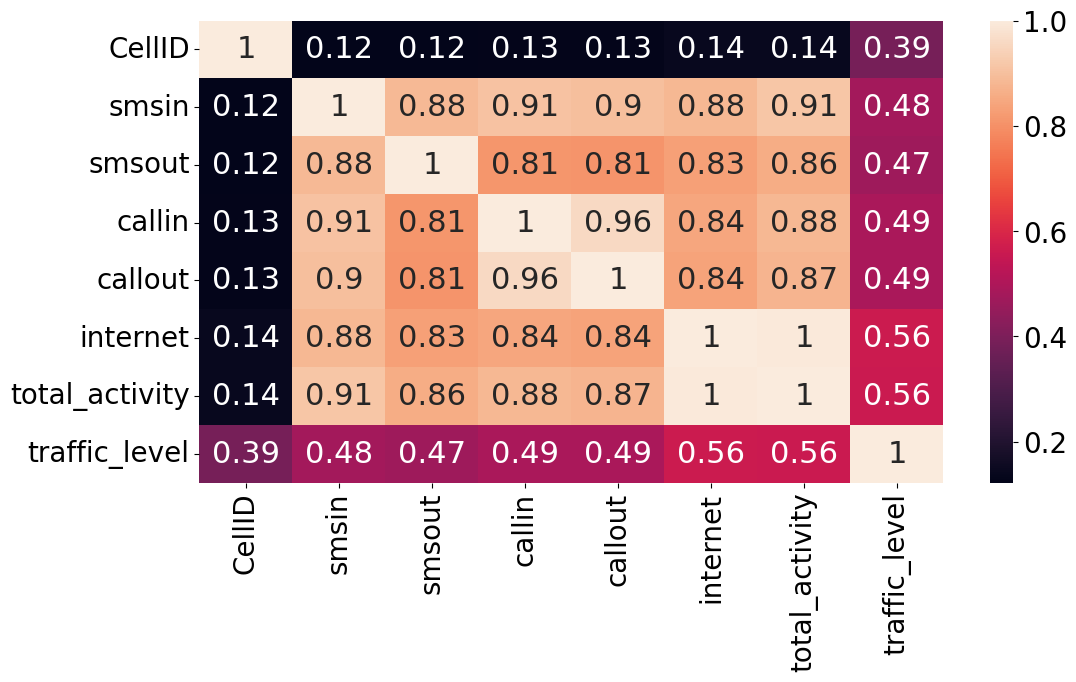

In [156]:
corr_results_all = all_data.corr()
fig = plt.figure(figsize = (12,6))
sns.heatmap(corr_results_all,annot = True)
plt.show()

In [157]:
#Standardization of data by removing mean and scale to unit variance
SS = StandardScaler()
scaled_all_day = SS.fit_transform(all_data.iloc[:,:-1].astype("int32"))
#Target variable => Traffic level
target_all_y = all_data.iloc[:,-1:]
#Convert traffic level to one hot encoding.
traffic_level_all_day = keras.utils.np_utils.to_categorical(target_all_y)

In [158]:
#Split dataset as %60 for train, %40 for test
X_train_all_days,X_test_all_days,Y_train_all_levels,Y_test_all_levels = train_test_split(
                                                             scaled_all_day,
                                                             traffic_level_all_day,test_size = 0.4,
                                                             random_state = 42,shuffle = True)
#Add channel for convolution
X_train_all_days = np.expand_dims(X_train_all_days,axis = -1)
X_test_all_days = np.expand_dims(X_test_all_days,axis = -1)

In [159]:
#Split test dataset as %50 test and %50 validation.
X_test_all_days,X_val_all_days,Y_test_all_levels,Y_val_all_levels = train_test_split(
                                                             X_test_all_days,
                                                             Y_test_all_levels,test_size = 0.5,
                                                             random_state = 42,shuffle = False)

In [160]:
#Build model and compile it
all_days_model = build_model()
all_days_model.compile(optimizer = keras.optimizers.Adam(learning_rate = 0.01),loss = "categorical_crossentropy",
             metrics = ["accuracy"])

In [161]:
all_days_history = all_days_model.fit(X_train_all_days,Y_train_all_levels,epochs = 10,
                                batch_size = 256,validation_data = (X_val_all_days,Y_val_all_levels),
                        callbacks = keras.callbacks.EarlyStopping(monitor = "val_loss",patience = 3))

Epoch 1/10
17754/17754 [==============================] - 86s 5ms/step - loss: 0.0883 - accuracy: 0.9668 - val_loss: 0.0167 - val_accuracy: 0.9942
Epoch 2/10
17754/17754 [==============================] - 92s 5ms/step - loss: 0.0493 - accuracy: 0.9835 - val_loss: 0.0128 - val_accuracy: 0.9982
Epoch 3/10
17754/17754 [==============================] - 85s 5ms/step - loss: 0.0449 - accuracy: 0.9857 - val_loss: 0.0503 - val_accuracy: 0.9837
Epoch 4/10
17754/17754 [==============================] - 91s 5ms/step - loss: 0.0422 - accuracy: 0.9868 - val_loss: 0.0376 - val_accuracy: 0.9896
Epoch 5/10
17754/17754 [==============================] - 92s 5ms/step - loss: 0.0447 - accuracy: 0.9863 - val_loss: 0.0161 - val_accuracy: 0.9935


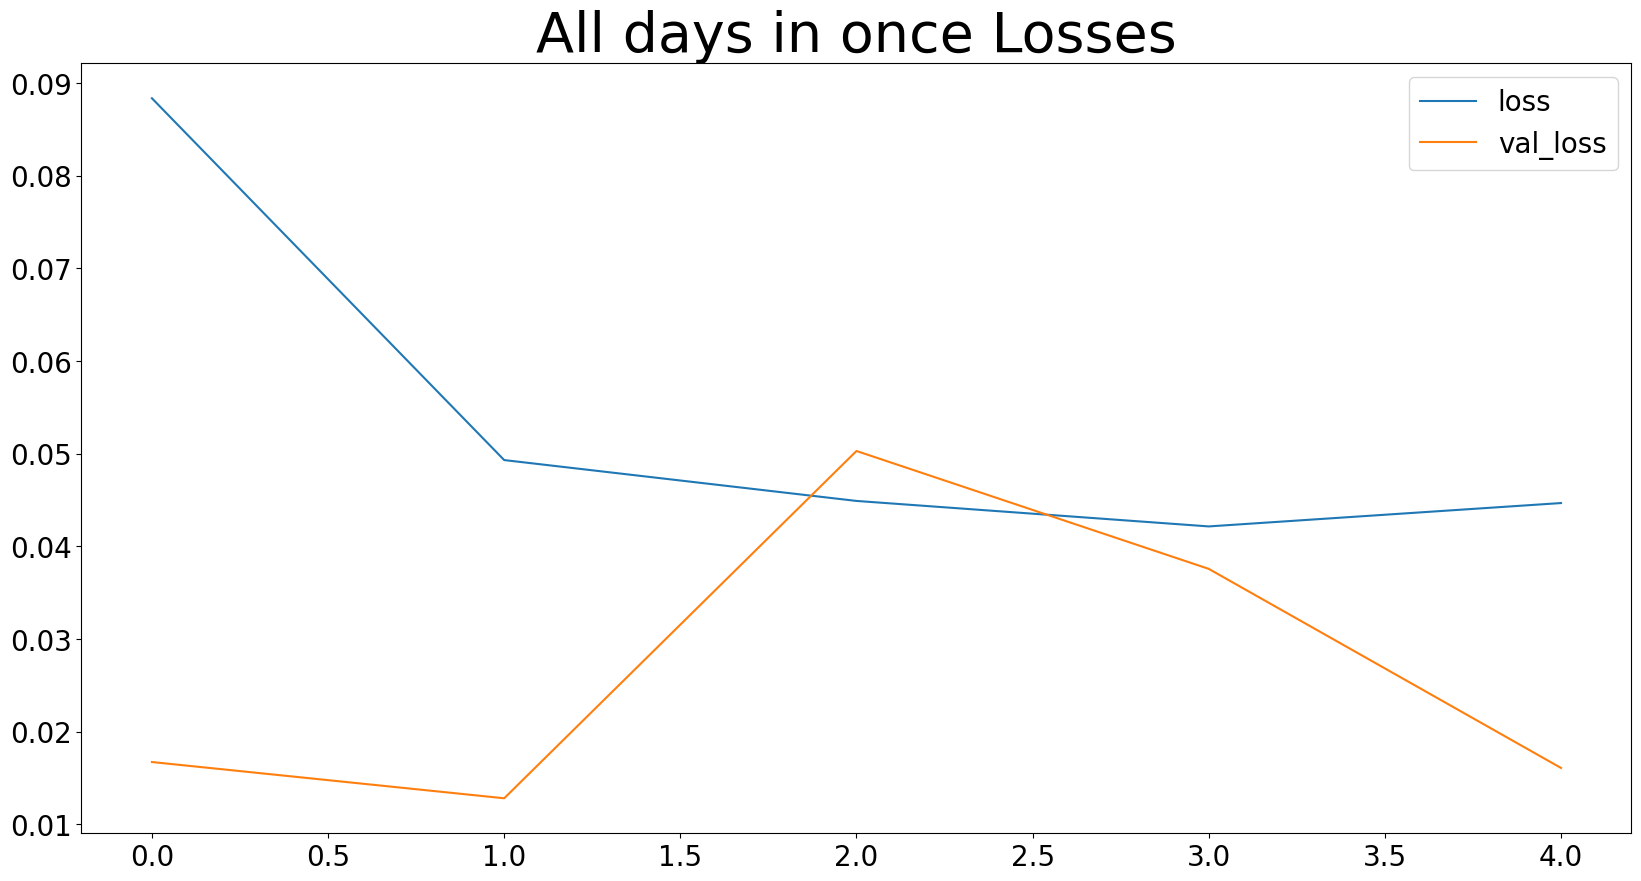

In [162]:
plt.figure(figsize = (20,10))
plt.rcParams.update({"font.size" : 20})
#PLOT LOSSES OF ALL DAYS IN ONCE
plt.plot(all_days_history.history["loss"])
plt.plot(all_days_history.history["val_loss"])

plt.legend(["loss","val_loss"])
plt.title("All days in once Losses",fontdict={"fontsize" : 40})

plt.show()

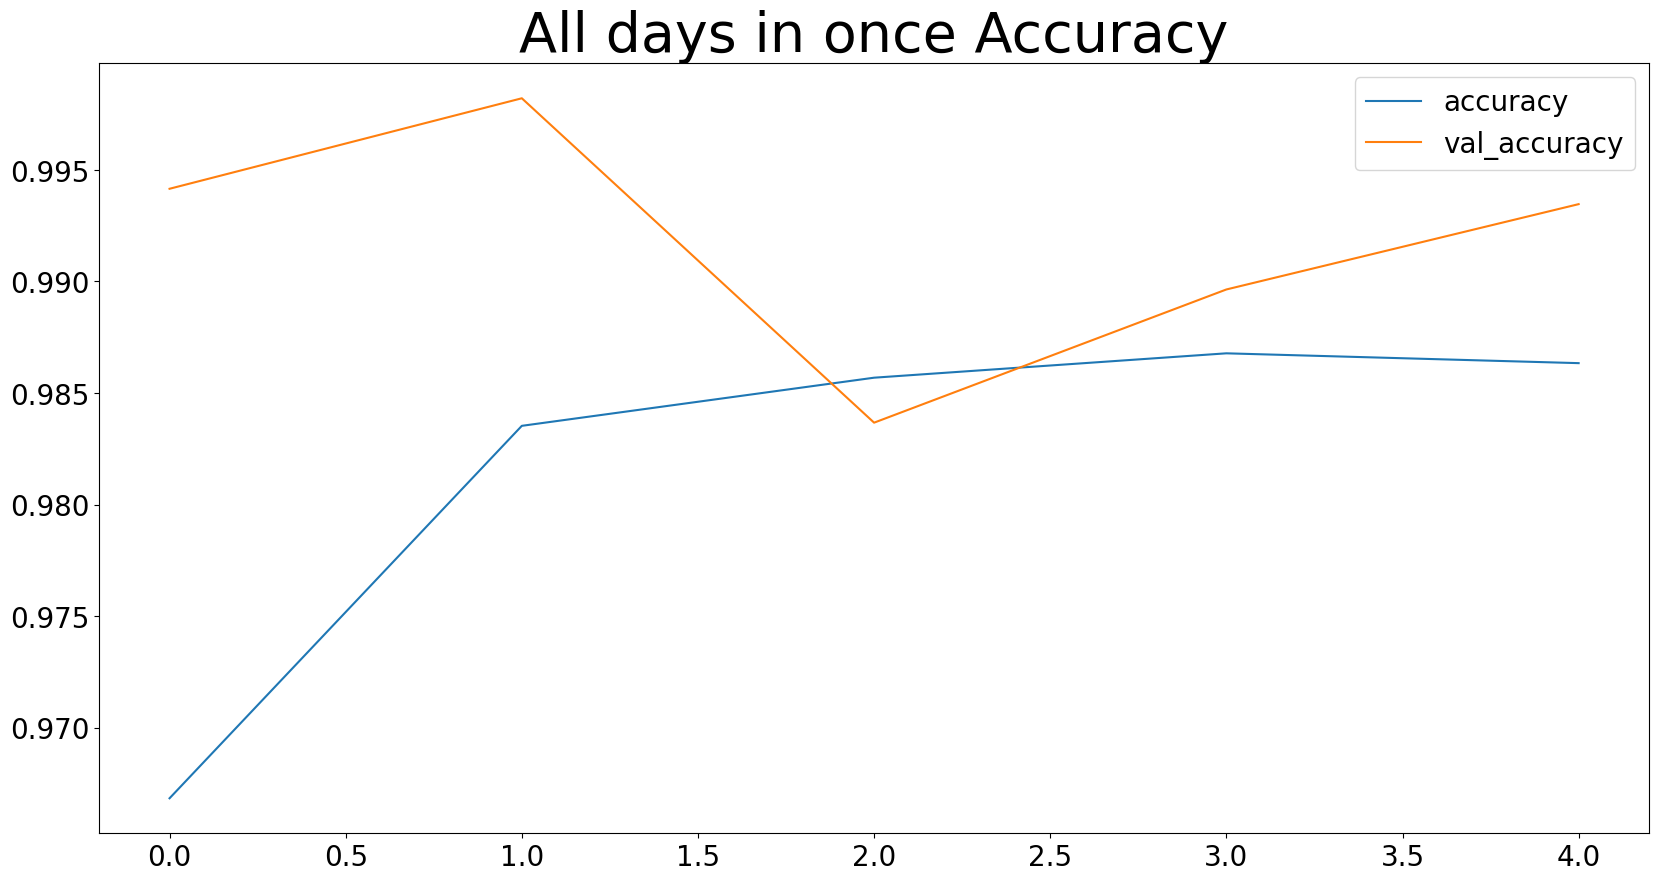

In [163]:
plt.figure(figsize = (20,10))
plt.rcParams.update({"font.size" : 20})
#PLOT ACCURACIES OF ALL DAYS IN ONCE
plt.plot(all_days_history.history["accuracy"])
plt.plot(all_days_history.history["val_accuracy"])

plt.legend(["accuracy","val_accuracy"])
plt.title("All days in once Accuracy",fontdict={"fontsize" : 40})

plt.show()

In [ ]:
#SAVE MODEL WEIGHTS 
all_days_model.save_weights(f"/kaggle/working/conv_all_days_model.h5")

# PREDICTION WEEKLY

In [164]:
all_days_preds = all_days_model.predict(X_test_all_days)

47343/47343 [==============================] - 86s 2ms/step


In [165]:
#ONE HOT ENCODING TO LABEL
all_days_preds_decoded = [np.argmax(all_days_preds[i])for i in range(len(all_days_preds))]
y_test_all_levels_decoded = [np.argmax(Y_test_all_levels[i])for i in range(len(Y_test_all_levels))]

In [166]:
#CONCATENATE TWO DF to GET RESULTS TABLE
all_days_preds_decoded_df = pd.DataFrame(all_days_preds_decoded,columns = ["all_days_preds"])
y_test_all_levels_decoded_df = pd.DataFrame(y_test_all_levels_decoded,columns = ["all_days_real_levels"])

results_all_days_df = pd.concat([all_days_preds_decoded_df,y_test_all_levels_decoded_df],axis = 1)

In [167]:
print(classification_report(y_test_all_levels_decoded_df,all_days_preds_decoded_df,digits = 4))

              precision    recall  f1-score   support

           1     0.9952    0.9998    0.9975    391459
           2     0.9997    0.9927    0.9962    279378
           3     0.9993    0.9996    0.9994    201300
           4     0.9838    0.9998    0.9917    141213
           5     0.9453    0.9765    0.9607     96185
           6     0.9999    0.9867    0.9932    405430

    accuracy                         0.9935   1514965
   macro avg     0.9872    0.9925    0.9898   1514965
weighted avg     0.9936    0.9935    0.9935   1514965



In [168]:
results_all_days_df.head(50)

all_days_preds  all_days_real_levels
0                6                     6
1                1                     2
2                2                     2
3                3                     3
4                5                     5
5                6                     6
6                1                     1
7                2                     2
8                6                     6
9                3                     3
10               3                     3
11               2                     2
12               3                     3
13               6                     6
14               3                     3
15               6                     6
16               6                     6
17               6                     6
18               2                     2
19               2                     2
20               6                     6
21               6                     6
22               5                     5
23               1                     1
24               1                     1
25               4                     4
26               5                     5
27               1                     1
28               2                     2
29               4                     4
30               1                     1
31               2                     2
32               1                     1
33               2                     2
34               3                     3
35               6                     6
36               2                     2
37               2                     2
38               4                     4
39               4                     4
40               3                     3
41               3                     3
42               4                     4
43               6                     6
44               6                     6
45               2                     2
46               5                     5
47               2                     2
48               6                     6
49               6                     6

# MODEL WITH AVERAGE WEIGHTS OF DAY MODELS

In [ ]:
print(model_days["monday"].get_weights()[0].size)
print(model_days["tuesday"].get_weights()[0].size)

In [ ]:
model_days["monday"].get_weights()